In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (171).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (54).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (80).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (269).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (20).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (173).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (193).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (286).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (93).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (31).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (36).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (117).jpg
/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/

In [2]:
import pathlib

# Assuming data_dir is the path to the directory containing subdirectories for each plant class
data_dir = pathlib.Path("/kaggle/input/newherb300/data300")

# Use glob to get a list of all subdirectories representing plant classes in data_dir
plant_classes = [subdir.name for subdir in data_dir.glob('*') if subdir.is_dir()]

# Initialize an empty dictionary
leaf_images_dict = {}

# Loop through each plant class and populate the dictionary
for plant_class in plant_classes:
    # Use the plant class name as the key and create a list of file paths using glob
    leaf_images_dict[plant_class] = list((data_dir / plant_class).glob('*'))

# Print the number of classes
print(f"Number of classes: {len(plant_classes)}")

# Print the number of images per class
for plant_class, file_paths in leaf_images_dict.items():
    print(f"{plant_class}: {len(file_paths)} images")

Number of classes: 53
Artocarpus_Heterophyllus: 300 images
John Wart: 300 images
Alkanet_Root: 303 images
sweet flag: 300 images
Mint: 301 images
aconitum ferox: 300 images
Solanum: 301 images
Lonicera_caprifol: 301 images
Prunella_vulgaris: 301 images
Beefsteakk: 301 images
Gotukola: 301 images
Myrica esculentaa: 301 images
Castor: 301 images
Brassica_Juncea: 301 images
Papaya: 300 images
Kasambruga: 300 images
leonarus: 301 images
Neem: 300 images
Kamarkas: 301 images
Holarrhena antidysenterica: 301 images
Ballon Vine: 300 images
Chinese_Yumm: 302 images
Lochnera_rosea: 301 images
Aloevera: 300 images
Phyllanthuss: 301 images
Abelmoschus_sagittifolius: 300 images
Achyranthes_asperaa: 298 images
Indian Bay Leaf: 294 images
Abutilon_indicumm: 300 images
Taro: 300 images
Arborvitae: 301 images
Clerodendrum_serratumm: 301 images
Pongamia_pinnata: 301 images
Oleander: 293 images
Tulsii: 301 images
Goumi_berries: 301 images
Tinospora cordifolia: 300 images
Kalanchoe pinnata: 300 images
Art

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


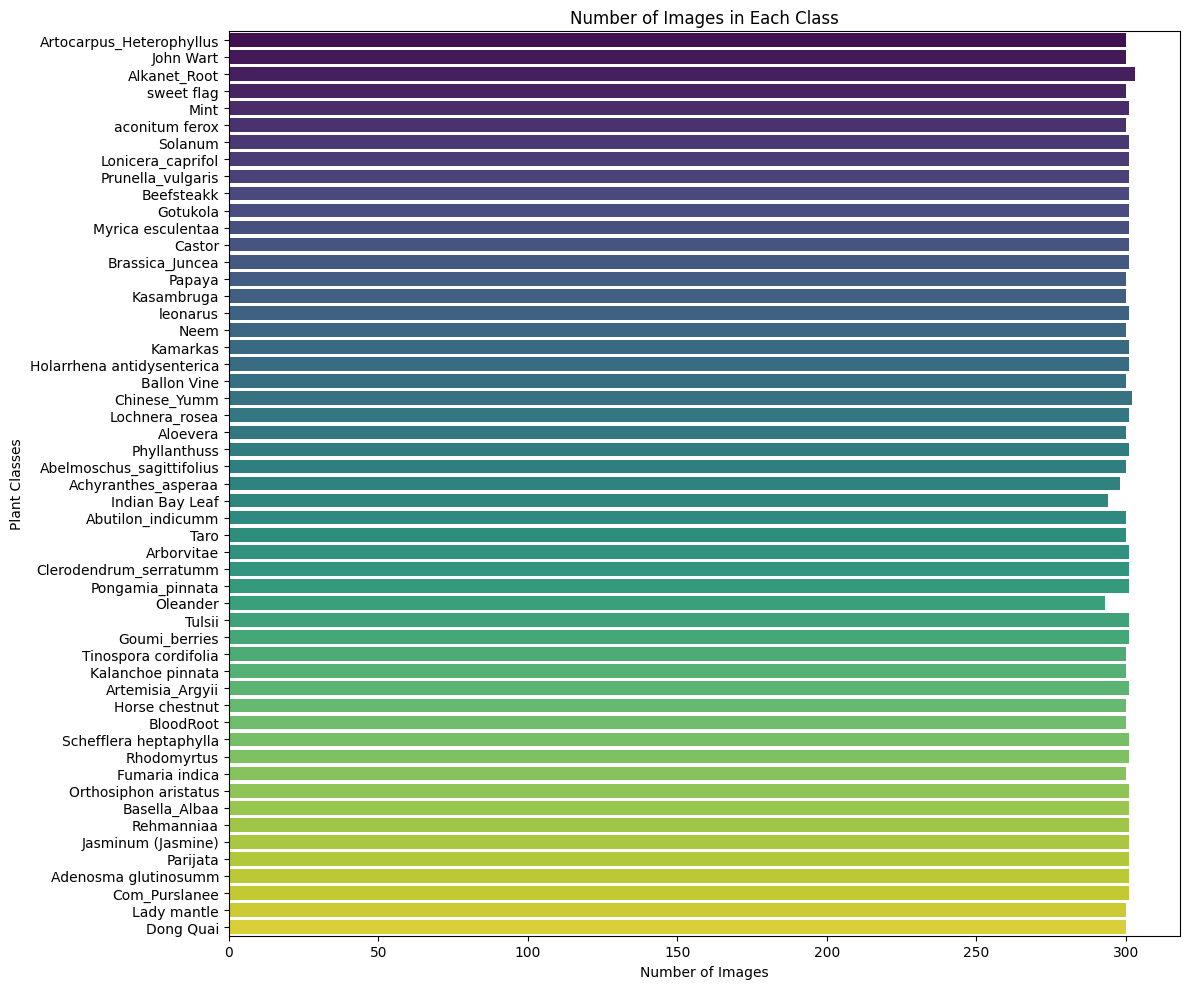

In [3]:
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_dir is the path to the directory containing subdirectories for each plant class
data_dir = pathlib.Path("/kaggle/input/newherb300/data300")

# Use glob to get a list of all subdirectories representing plant classes in data_dir
plant_classes = [subdir.name for subdir in data_dir.glob('*') if subdir.is_dir()]

# Initialize an empty dictionary
leaf_images_dict = {}

# Loop through each plant class and populate the dictionary
for plant_class in plant_classes:
    # Use the plant class name as the key and create a list of file paths using glob
    leaf_images_dict[plant_class] = len(list((data_dir / plant_class).glob('*')))

# Convert dictionary to lists for plotting
class_names = list(leaf_images_dict.keys())
num_images = list(leaf_images_dict.values())

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(12, 10))
sns.barplot(x=num_images, y=class_names, palette='viridis')
plt.title('Number of Images in Each Class')
plt.xlabel('Number of Images')
plt.ylabel('Plant Classes')
plt.tight_layout()
plt.show()


In [4]:
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
import PIL
import pathlib
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

2024-03-11 09:03:04.929748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 09:03:04.929880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 09:03:05.098535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import os
import cv2  # Added import statement
import numpy as np
from sklearn.preprocessing import LabelEncoder

def load_data_and_labels(directory_path):
    x, y = [], []
    class_labels = []  # Moved outside the loop to collect all class labels

    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    
    for class_index, subdir in enumerate(subdirectories):
        class_path = os.path.join(directory_path, subdir)
        class_labels.append(subdir)  # Append class label
        
        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            try:
                img = cv2.imread(image_path)
                if img is not None:
                    # Resize image to (128, 128)
                    resized_img = cv2.resize(img, (180, 180))
                    x.append(resized_img)
                    y.append(class_index)
                else:
                    print(f"Error: Unable to read the image {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {str(e)}")

    return np.array(x), np.array(y), class_labels

herbdata_path = '/kaggle/input/newherb300/data300'
x, y, class_labels = load_data_and_labels(herbdata_path)

# Print class labels
print("Class Labels:")
for class_index, class_label in enumerate(class_labels):
    print(f"Class Index: {class_index}, Class Label: {class_label}")

Error: Unable to read the image /kaggle/input/newherb300/data300/Alkanet_Root/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Solanum/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Lonicera_caprifol/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Prunella_vulgaris/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Beefsteakk/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Gotukola/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Myrica esculentaa/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Brassica_Juncea/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/leonarus/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Kamarkas/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Holarrhena antidysenterica/desktop.i

libpng warning: iTXt: CRC error
libpng warning: iTXt: CRC error


Error: Unable to read the image /kaggle/input/newherb300/data300/Indian Bay Leaf/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Arborvitae/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Clerodendrum_serratumm/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Pongamia_pinnata/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Oleander/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Tulsii/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Goumi_berries/desktop.ini


Corrupt JPEG data: 441 extraneous bytes before marker 0xd9


Error: Unable to read the image /kaggle/input/newherb300/data300/Artemisia_Argyii/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Schefflera heptaphylla/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Rhodomyrtus/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Orthosiphon aristatus/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Basella_Albaa/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Rehmanniaa/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Jasminum (Jasmine)/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Parijata/desktop.ini
Error: Unable to read the image /kaggle/input/newherb300/data300/Com_Purslanee/desktop.ini
Class Labels:
Class Index: 0, Class Label: Artocarpus_Heterophyllus
Class Index: 1, Class Label: John Wart
Class Index: 2, Class Label: Alkanet_Root
Class Index: 3, C

In [6]:
# Split the dataset into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define ImageDataGenerator instances without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 128
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

train_generator = train_datagen.flow(x_train, y_train_one_hot, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val_one_hot, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(x_test, y_test_one_hot, batch_size=batch_size, shuffle=False)

In [7]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from keras.layers import GlobalAveragePooling2D

# MODEL 1

In [8]:
from tensorflow.keras import layers, models
img_shape = (180, 180, 3)
num_classes = 53

# Define the model
model = models.Sequential([
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
     layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(64, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(128, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    layers.Conv2D(256, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),

    # Additional Convolutional Layers
    layers.Conv2D(512, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
   

    # Flatten layer
    layers.Flatten(),

    # Additional Dense layers
    #layers.Dense(1024, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    #layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/87 ━━━━━━━━━━━━━━━━━━━━ 55:05 38s/step - accuracy: 0.0078 - auc: 0.4779 - categorical_accuracy: 0.0078 - loss: 5.4134 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1710148120.192587      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.0248 - auc: 0.5227 - categorical_accuracy: 0.0248 - loss: 4.8927 - precision: 0.0857 - recall: 0.0050
Epoch 1: val_accuracy improved from -inf to 0.01804, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 85s 541ms/step - accuracy: 0.0249 - auc: 0.5230 - categorical_accuracy: 0.0249 - loss: 4.8892 - precision: 0.0861 - recall: 0.0050 - val_accuracy: 0.0180 - val_auc: 0.4877 - val_categorical_accuracy: 0.0180 - val_loss: 4.4302 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.0535 - auc: 0.6424 - categorical_accuracy: 0.0535 - loss: 3.9712 - precision: 0.1931 - recall: 0.0087
Epoch 2: val_accuracy improved from 0.01804 to 0.02392, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.0536 - auc: 0.6428 - categorical_accuracy: 0.0536 - loss: 3.9698 - precision: 0.1932 - recall: 0.0087 - val_accuracy: 0.0239 - val_auc: 0.

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.5844 - auc: 0.9710 - categorical_accuracy: 0.5844 - loss: 1.3986 - precision: 0.8000 - recall: 0.4382
Epoch 1: val_accuracy improved from -inf to 0.54259, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 399ms/step - accuracy: 0.5844 - auc: 0.9710 - categorical_accuracy: 0.5844 - loss: 1.3985 - precision: 0.8001 - recall: 0.4383 - val_accuracy: 0.5426 - val_auc: 0.9573 - val_categorical_accuracy: 0.5426 - val_loss: 1.5932 - val_precision: 0.7318 - val_recall: 0.4650
Epoch 2/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.6105 - auc: 0.9732 - categorical_accuracy: 0.6105 - loss: 1.3185 - precision: 0.8177 - recall: 0.4621
Epoch 2: val_accuracy improved from 0.54259 to 0.57029, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.6105 - auc: 0.9732 - categorical_accuracy: 0.6105 - loss: 1.3186 - precision: 0.8177 - recall: 0.4621 - val_accuracy: 0.5703 - val_auc:

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.7972 - auc: 0.9883 - categorical_accuracy: 0.7972 - loss: 0.6981 - precision: 0.8786 - recall: 0.7260
Epoch 1: val_accuracy improved from -inf to 0.80906, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.7972 - auc: 0.9883 - categorical_accuracy: 0.7972 - loss: 0.6982 - precision: 0.8785 - recall: 0.7260 - val_accuracy: 0.8091 - val_auc: 0.9802 - val_categorical_accuracy: 0.8091 - val_loss: 0.7176 - val_precision: 0.8638 - val_recall: 0.7826
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7929 - auc: 0.9883 - categorical_accuracy: 0.7929 - loss: 0.6960 - precision: 0.8752 - recall: 0.7287
Epoch 2: val_accuracy did not improve from 0.80906
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7929 - auc: 0.9882 - categorical_accuracy: 0.7929 - loss: 0.6961 - precision: 0.8751 - recall: 0.7287 - val_accuracy: 0.8015 - val_auc: 0.9786 - val_categorical_accuracy: 0.

In [12]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.8641 - auc: 0.9800 - categorical_accuracy: 0.8641 - loss: 0.5922 - precision: 0.8918 - recall: 0.8575
Test Loss: 0.5764629244804382
Test Accuracy: 0.868708074092865


In [13]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg",
               "/kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg",
               "/kaggle/input/newherb300/data300/Abutilon_indicumm/Abutilon_indicum (10).jpeg",
               "/kaggle/input/newherb300/data300/Achyranthes_asperaa/Achyranthes_asper (100).jpeg",
               "/kaggle/input/newherb300/data300/Adenosma glutinosumm/Adenosma glutinosumm (253).jpeg",
               "/kaggle/input/newherb300/data300/Alkanet_Root/Alkane root (100).jpeg",
               "/kaggle/input/newherb300/data300/Aloevera/Aloevera (10).jpeg",
               "/kaggle/input/newherb300/data300/Arborvitae/Arborvitae (100).jpeg",
               "/kaggle/input/newherb300/data300/Artemisia_Argyii/Artemisia argyii (109).png",
               "/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (100).jpg",
               "/kaggle/input/newherb300/data300/Ballon Vine/Ballon vine  (10).jpeg",
               "/kaggle/input/newherb300/data300/Basella_Albaa/Basella alba  (10).jpeg",
               "/kaggle/input/newherb300/data300/Beefsteakk/Beefsteakk (101).jpeg",
               "/kaggle/input/newherb300/data300/BloodRoot/BloodRoot (10).jpeg",
               "/kaggle/input/newherb300/data300/Brassica_Juncea/Brassica Juncea (100).jpg",
               "/kaggle/input/newherb300/data300/Castor/castor (10).jpeg",
               "/kaggle/input/newherb300/data300/Chinese_Yumm/Chinese Yumm (10).jpeg",
               "/kaggle/input/newherb300/data300/Clerodendrum_serratumm/Clerodendrum serratum (10).jpeg",
               "/kaggle/input/newherb300/data300/Com_Purslanee/Com purslanee (100).jpeg",
               "/kaggle/input/newherb300/data300/Dong Quai/Dong Quai  (10).jpeg",
               "/kaggle/input/newherb300/data300/Fumaria indica/Fumaria indica (101).jpeg",
               "/kaggle/input/newherb300/data300/Gotukola/Gotukola (10).jpeg",
               "/kaggle/input/newherb300/data300/Goumi_berries/Goumi berries (10).jpeg",
               "/kaggle/input/newherb300/data300/Holarrhena antidysenterica/Holarrhena antidysentericaa (10).jpeg",
               "/kaggle/input/newherb300/data300/Horse chestnut/Horse chestnut (10).jpeg",
               "/kaggle/input/newherb300/data300/Indian Bay Leaf/Indian bayleaf  (1).png",
               "/kaggle/input/newherb300/data300/Jasminum (Jasmine)/jasminum (103).jpg",
               "/kaggle/input/newherb300/data300/John Wart/John Wart (1).jpeg",
               "/kaggle/input/newherb300/data300/Kalanchoe pinnata/Kalanchoe pinnata  (1).png",
               "/kaggle/input/newherb300/data300/Kamarkas/kamarkas (10).jpeg",
               "/kaggle/input/newherb300/data300/Kasambruga/Kasambruga (1).png",
               "/kaggle/input/newherb300/data300/Lady mantle/Lady mantlee (10).jpeg",
               "/kaggle/input/newherb300/data300/Lochnera_rosea/Lochnera rosea (10).jpg","/kaggle/input/newherb300/data300/Lonicera_caprifol/Lonicera caprifoliumm (1).png",
               "/kaggle/input/newherb300/data300/Mint/Mint  (1).png","/kaggle/input/newherb300/data300/Myrica esculentaa/Myrica esculenta  (10).jpeg",
               "/kaggle/input/newherb300/data300/Neem/Neem (1).jpeg","/kaggle/input/newherb300/data300/Oleander/Oleander (10).jpeg",
               "/kaggle/input/newherb300/data300/Orthosiphon aristatus/Orthosiphon aristatus (1).png","/kaggle/input/newherb300/data300/Parijata/Parijata  (10).jpg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg","/kaggle/input/newherb300/data300/Pongamia_pinnata/Pongamia pinnata a (1).jpeg",
               "/kaggle/input/newherb300/data300/Prunella_vulgaris/Prunella vulgariss  (1).jpeg","/kaggle/input/newherb300/data300/Rehmanniaa/Rehmanniaa (1).png",
               "/kaggle/input/newherb300/data300/Rhodomyrtus/Rhodomyrtus tomentosaa  (1).jpeg","/kaggle/input/newherb300/data300/Schefflera heptaphylla/Schefflera heptaphylla (1).jpeg",
               "/kaggle/input/newherb300/data300/Solanum/Solanum (1).jpeg","/kaggle/input/newherb300/data300/Tinospora cordifolia/Tinospora cordifolia (1).png",
               "/kaggle/input/newherb300/data300/Tulsii/Tulsii (1).jpeg","/kaggle/input/newherb300/data300/aconitum ferox/aconitum ferox  (1).jpeg",
               "/kaggle/input/newherb300/data300/leonarus/Leonuruss (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.99999166

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.94492376

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.9968141

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.9807469

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.99885046

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Abutilon_indi

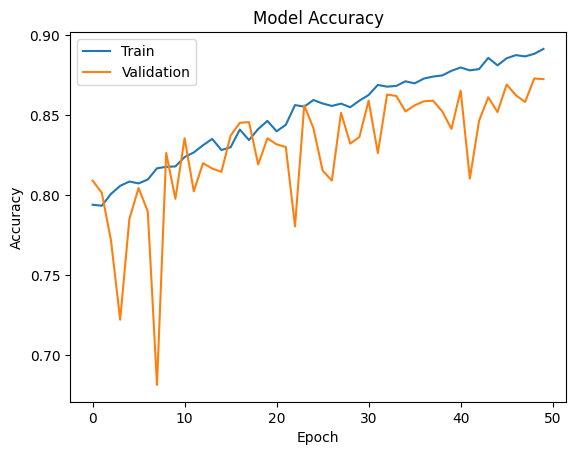

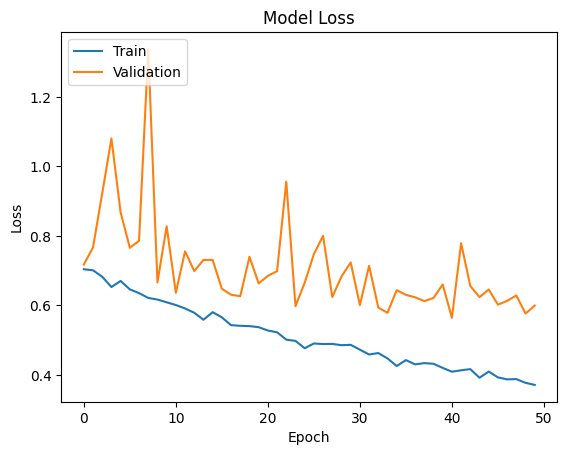

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [15]:
import cv2
import numpy as np

# Load the image
image_path = "/kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (1).jpg"  # Replace "path_to_your_image.jpg" with the path to your image
img = cv2.imread(image_path)
img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

# Preprocess the image
img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(img)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]  # Assuming you have the class labels

# Print the predicted class label
print("Predicted Class Label:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class Label: Abelmoschus_sagittifolius


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step


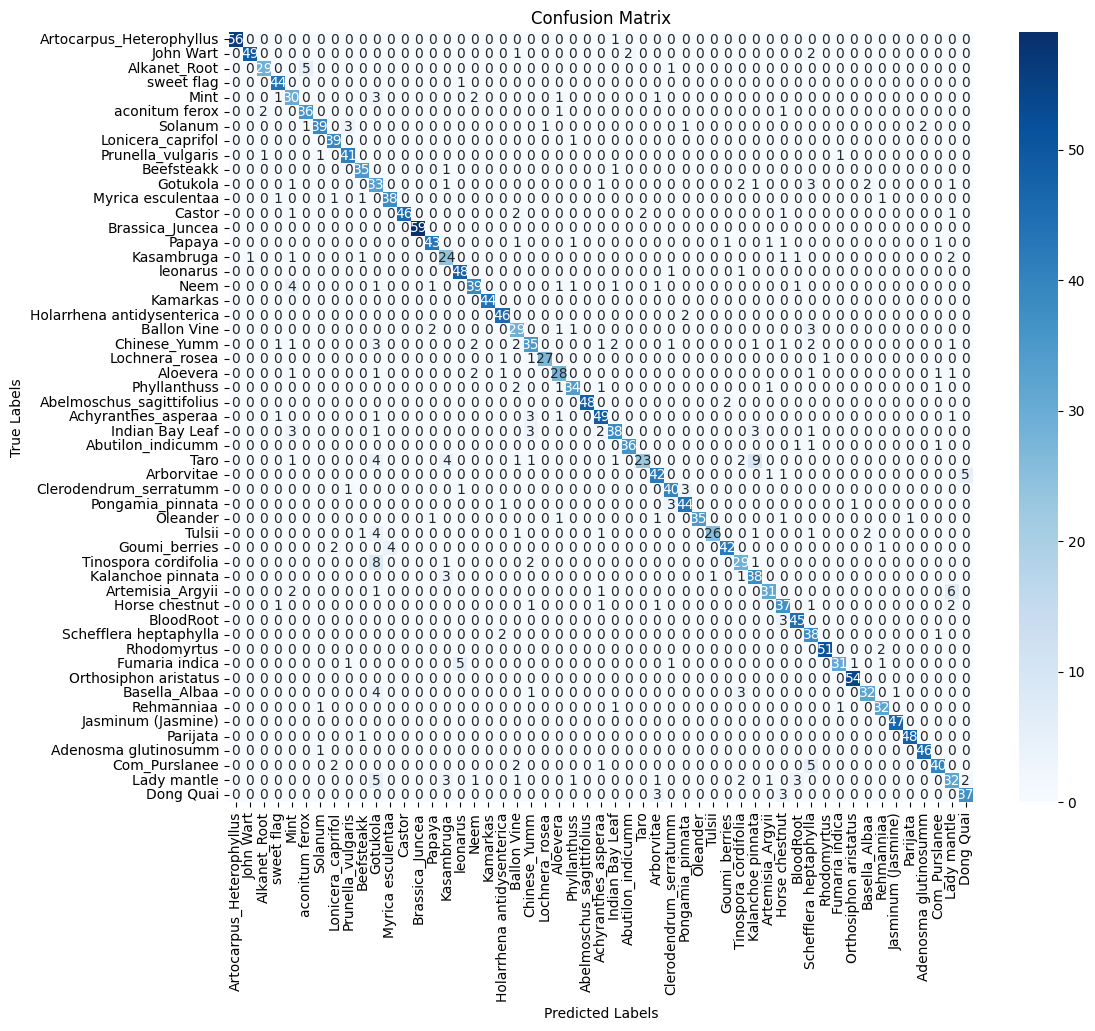

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]




# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.99999166

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.94492376

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.9968141

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.9807469



# MODEL 2

In [18]:
from tensorflow.keras import layers, models
img_shape = (180, 180, 3)
num_classes = 53

# Define the model
model = models.Sequential([
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(64, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    #layers.Conv2D(64, (5, 5),padding='same', activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.3),
    
    
    layers.Conv2D(128, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    layers.Conv2D(256, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    
    layers.Conv2D(512, (7, 7),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),

   
    # Flatten layer
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    #layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.0248 - auc: 0.5196 - categorical_accuracy: 0.0248 - loss: 4.9213 - precision: 0.0540 - recall: 0.0028
Epoch 1: val_accuracy improved from -inf to 0.01301, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 401ms/step - accuracy: 0.0249 - auc: 0.5200 - categorical_accuracy: 0.0249 - loss: 4.9179 - precision: 0.0546 - recall: 0.0028 - val_accuracy: 0.0130 - val_auc: 0.4951 - val_categorical_accuracy: 0.0130 - val_loss: 4.2056 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0604 - auc: 0.6529 - categorical_accuracy: 0.0604 - loss: 3.9971 - precision: 0.1955 - recall: 0.0107
Epoch 2: val_accuracy improved from 0.01301 to 0.02224, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.0606 - auc: 0.6533 - categorical_accuracy: 0.0606 - loss: 3.9955 - precision: 0.1957 - recall: 0.0108 - val_accuracy: 0.0222 - 

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6024 - auc: 0.9737 - categorical_accuracy: 0.6024 - loss: 1.3133 - precision: 0.7958 - recall: 0.4555
Epoch 1: val_accuracy improved from -inf to 0.62149, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 60s 387ms/step - accuracy: 0.6024 - auc: 0.9737 - categorical_accuracy: 0.6024 - loss: 1.3133 - precision: 0.7959 - recall: 0.4554 - val_accuracy: 0.6215 - val_auc: 0.9684 - val_categorical_accuracy: 0.6215 - val_loss: 1.3022 - val_precision: 0.7650 - val_recall: 0.5191
Epoch 2/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6091 - auc: 0.9758 - categorical_accuracy: 0.6091 - loss: 1.2644 - precision: 0.7985 - recall: 0.4663
Epoch 2: val_accuracy did not improve from 0.62149
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.6090 - auc: 0.9758 - categorical_accuracy: 0.6090 - loss: 1.2646 - precision: 0.7984 - recall: 0.4662 - val_accuracy: 0.6152 - val_auc: 0.9705 - val_categorical_accuracy: 0.

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.8265 - auc: 0.9911 - categorical_accuracy: 0.8265 - loss: 0.5864 - precision: 0.8830 - recall: 0.7703
Epoch 1: val_accuracy improved from -inf to 0.80151, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 57s 346ms/step - accuracy: 0.8265 - auc: 0.9911 - categorical_accuracy: 0.8265 - loss: 0.5866 - precision: 0.8830 - recall: 0.7703 - val_accuracy: 0.8015 - val_auc: 0.9737 - val_categorical_accuracy: 0.8015 - val_loss: 0.8163 - val_precision: 0.8478 - val_recall: 0.7809
Epoch 2/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8217 - auc: 0.9900 - categorical_accuracy: 0.8217 - loss: 0.6032 - precision: 0.8829 - recall: 0.7735
Epoch 2: val_accuracy did not improve from 0.80151
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.8217 - auc: 0.9900 - categorical_accuracy: 0.8217 - loss: 0.6031 - precision: 0.8829 - recall: 0.7735 - val_accuracy: 0.7868 - val_auc: 0.9730 - val_categorical_accuracy: 0.

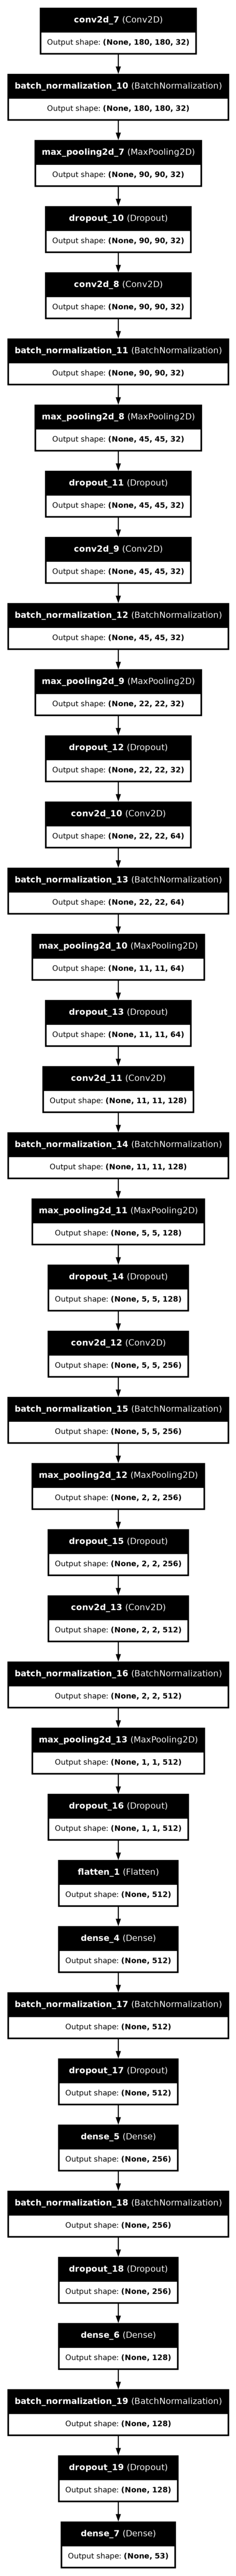

In [22]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot directly in the notebook
img = plt.imread('model_plot.png')
plt.figure(figsize=(120, 60))
plt.imshow(img)
plt.axis('off')
plt.show()


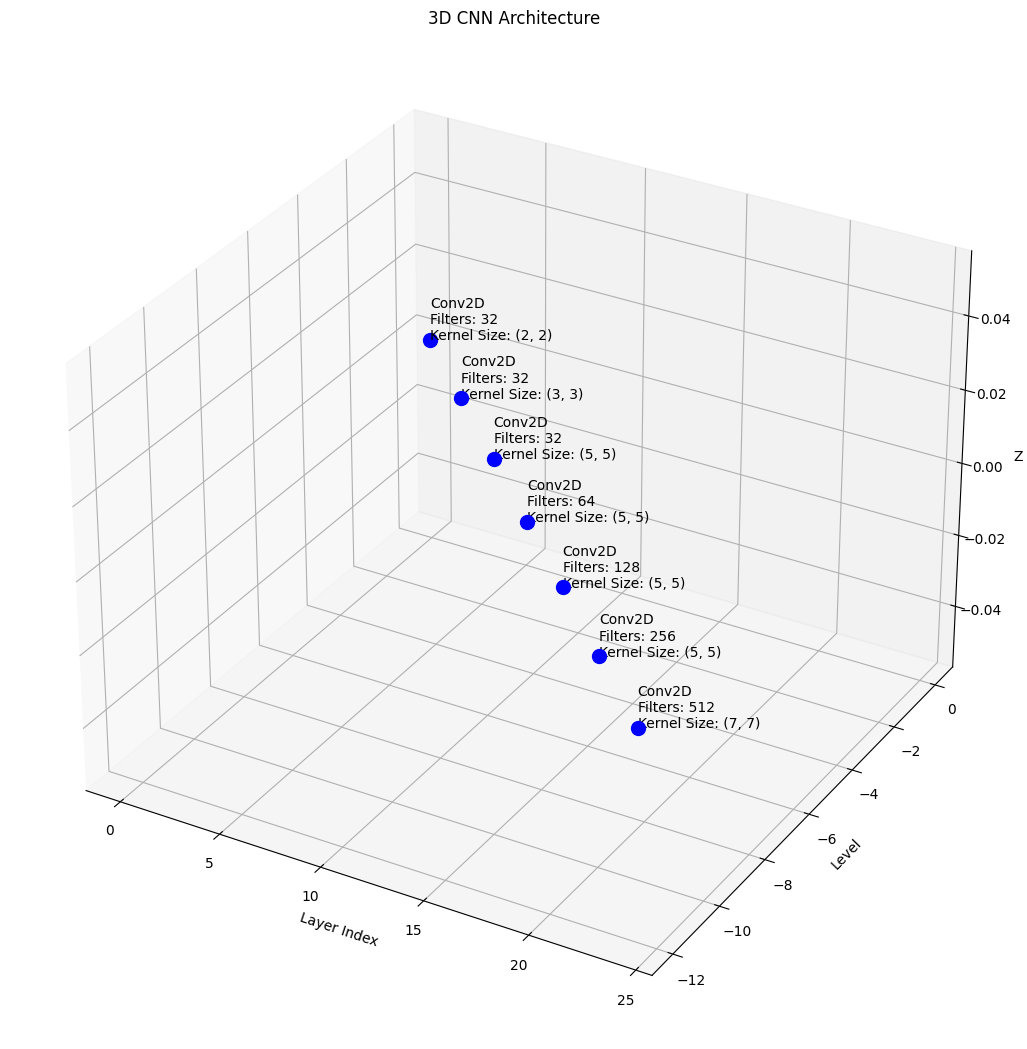

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import layers

def plot_3d_cnn_architecture(model):
    fig = plt.figure(figsize=(13, 26))
    ax = fig.add_subplot(111, projection='3d')
    model_layers = model.layers

    layer_colors = {
        "Conv2D": "blue",
        "MaxPooling2D": "green",
        "Dropout": "red",
        "Dense": "purple",
        "Flatten": "orange"
    }

    level_spacing = 2  # Adjust this value to change the spacing between levels

    current_level = 0
    for i, layer in enumerate(model_layers):
        if isinstance(layer, layers.Conv2D):
            ax.scatter(i, -current_level * level_spacing, 0, color=layer_colors.get("Conv2D", "black"), s=100)
            ax.text(i, -current_level * level_spacing, 0, f'Conv2D\nFilters: {layer.filters}\nKernel Size: {layer.kernel_size}', color='black')
            current_level += 1

    ax.set_xlabel('Layer Index')
    ax.set_ylabel('Level')
    ax.set_zlabel('Z')
    ax.set_title('3D CNN Architecture')
    ax.grid(True)

    plt.show()

# Assuming 'model' is your Sequential model defined earlier
plot_3d_cnn_architecture(model)


In [24]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8720 - auc: 0.9763 - categorical_accuracy: 0.8720 - loss: 0.6009 - precision: 0.8959 - recall: 0.8645
Test Loss: 0.6131308674812317
Test Accuracy: 0.8758389353752136


In [25]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg",
               "/kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg",
               "/kaggle/input/newherb300/data300/Abutilon_indicumm/Abutilon_indicum (10).jpeg",
               "/kaggle/input/newherb300/data300/Achyranthes_asperaa/Achyranthes_asper (100).jpeg",
               "/kaggle/input/newherb300/data300/Adenosma glutinosumm/Adenosma glutinosumm (253).jpeg",
               "/kaggle/input/newherb300/data300/Alkanet_Root/Alkane root (100).jpeg",
               "/kaggle/input/newherb300/data300/Aloevera/Aloevera (10).jpeg",
               "/kaggle/input/newherb300/data300/Arborvitae/Arborvitae (100).jpeg",
               "/kaggle/input/newherb300/data300/Artemisia_Argyii/Artemisia argyii (109).png",
               "/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (100).jpg",
               "/kaggle/input/newherb300/data300/Ballon Vine/Ballon vine  (10).jpeg",
               "/kaggle/input/newherb300/data300/Basella_Albaa/Basella alba  (10).jpeg",
               "/kaggle/input/newherb300/data300/Beefsteakk/Beefsteakk (101).jpeg",
               "/kaggle/input/newherb300/data300/BloodRoot/BloodRoot (10).jpeg",
               "/kaggle/input/newherb300/data300/Brassica_Juncea/Brassica Juncea (100).jpg",
               "/kaggle/input/newherb300/data300/Castor/castor (10).jpeg",
               "/kaggle/input/newherb300/data300/Chinese_Yumm/Chinese Yumm (10).jpeg",
               "/kaggle/input/newherb300/data300/Clerodendrum_serratumm/Clerodendrum serratum (10).jpeg",
               "/kaggle/input/newherb300/data300/Com_Purslanee/Com purslanee (100).jpeg",
               "/kaggle/input/newherb300/data300/Dong Quai/Dong Quai  (10).jpeg",
               "/kaggle/input/newherb300/data300/Fumaria indica/Fumaria indica (101).jpeg",
               "/kaggle/input/newherb300/data300/Gotukola/Gotukola (10).jpeg",
               "/kaggle/input/newherb300/data300/Goumi_berries/Goumi berries (10).jpeg",
               "/kaggle/input/newherb300/data300/Holarrhena antidysenterica/Holarrhena antidysentericaa (10).jpeg",
               "/kaggle/input/newherb300/data300/Horse chestnut/Horse chestnut (10).jpeg",
               "/kaggle/input/newherb300/data300/Indian Bay Leaf/Indian bayleaf  (1).png",
               "/kaggle/input/newherb300/data300/Jasminum (Jasmine)/jasminum (103).jpg",
               "/kaggle/input/newherb300/data300/John Wart/John Wart (1).jpeg",
               "/kaggle/input/newherb300/data300/Kalanchoe pinnata/Kalanchoe pinnata  (1).png",
               "/kaggle/input/newherb300/data300/Kamarkas/kamarkas (10).jpeg",
               "/kaggle/input/newherb300/data300/Kasambruga/Kasambruga (1).png",
               "/kaggle/input/newherb300/data300/Lady mantle/Lady mantlee (10).jpeg",
               "/kaggle/input/newherb300/data300/Lochnera_rosea/Lochnera rosea (10).jpg","/kaggle/input/newherb300/data300/Lonicera_caprifol/Lonicera caprifoliumm (1).png",
               "/kaggle/input/newherb300/data300/Mint/Mint  (1).png","/kaggle/input/newherb300/data300/Myrica esculentaa/Myrica esculenta  (10).jpeg",
               "/kaggle/input/newherb300/data300/Neem/Neem (1).jpeg","/kaggle/input/newherb300/data300/Oleander/Oleander (10).jpeg",
               "/kaggle/input/newherb300/data300/Orthosiphon aristatus/Orthosiphon aristatus (1).png","/kaggle/input/newherb300/data300/Parijata/Parijata  (10).jpg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg","/kaggle/input/newherb300/data300/Pongamia_pinnata/Pongamia pinnata a (1).jpeg",
               "/kaggle/input/newherb300/data300/Prunella_vulgaris/Prunella vulgariss  (1).jpeg","/kaggle/input/newherb300/data300/Rehmanniaa/Rehmanniaa (1).png",
               "/kaggle/input/newherb300/data300/Rhodomyrtus/Rhodomyrtus tomentosaa  (1).jpeg","/kaggle/input/newherb300/data300/Schefflera heptaphylla/Schefflera heptaphylla (1).jpeg",
               "/kaggle/input/newherb300/data300/Solanum/Solanum (1).jpeg","/kaggle/input/newherb300/data300/Tinospora cordifolia/Tinospora cordifolia (1).png",
               "/kaggle/input/newherb300/data300/Tulsii/Tulsii (1).jpeg","/kaggle/input/newherb300/data300/aconitum ferox/aconitum ferox  (1).jpeg",
               "/kaggle/input/newherb300/data300/leonarus/Leonuruss (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.9999807

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.89661443

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.9980027

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.9951224

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.9992433

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/newherb300/data300/Abutilon_ind

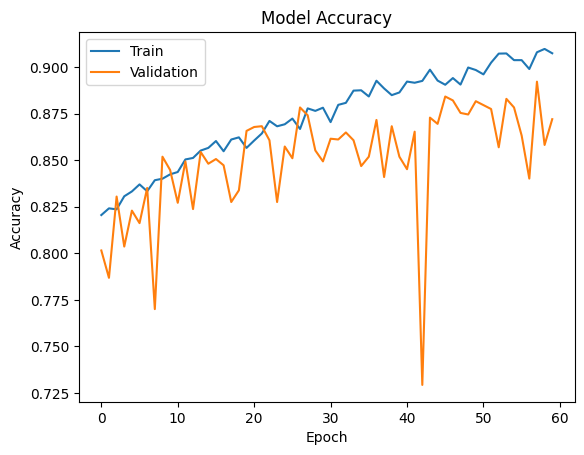

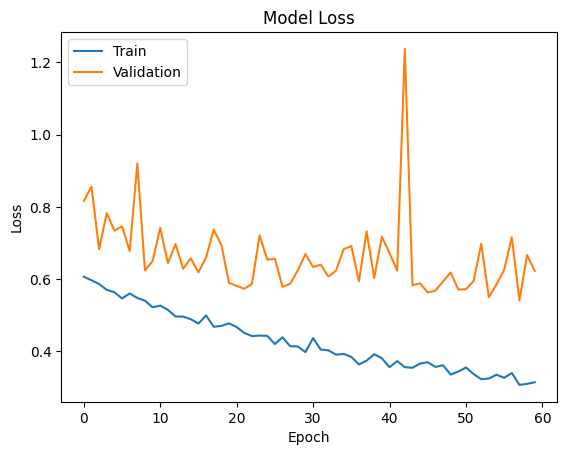

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step


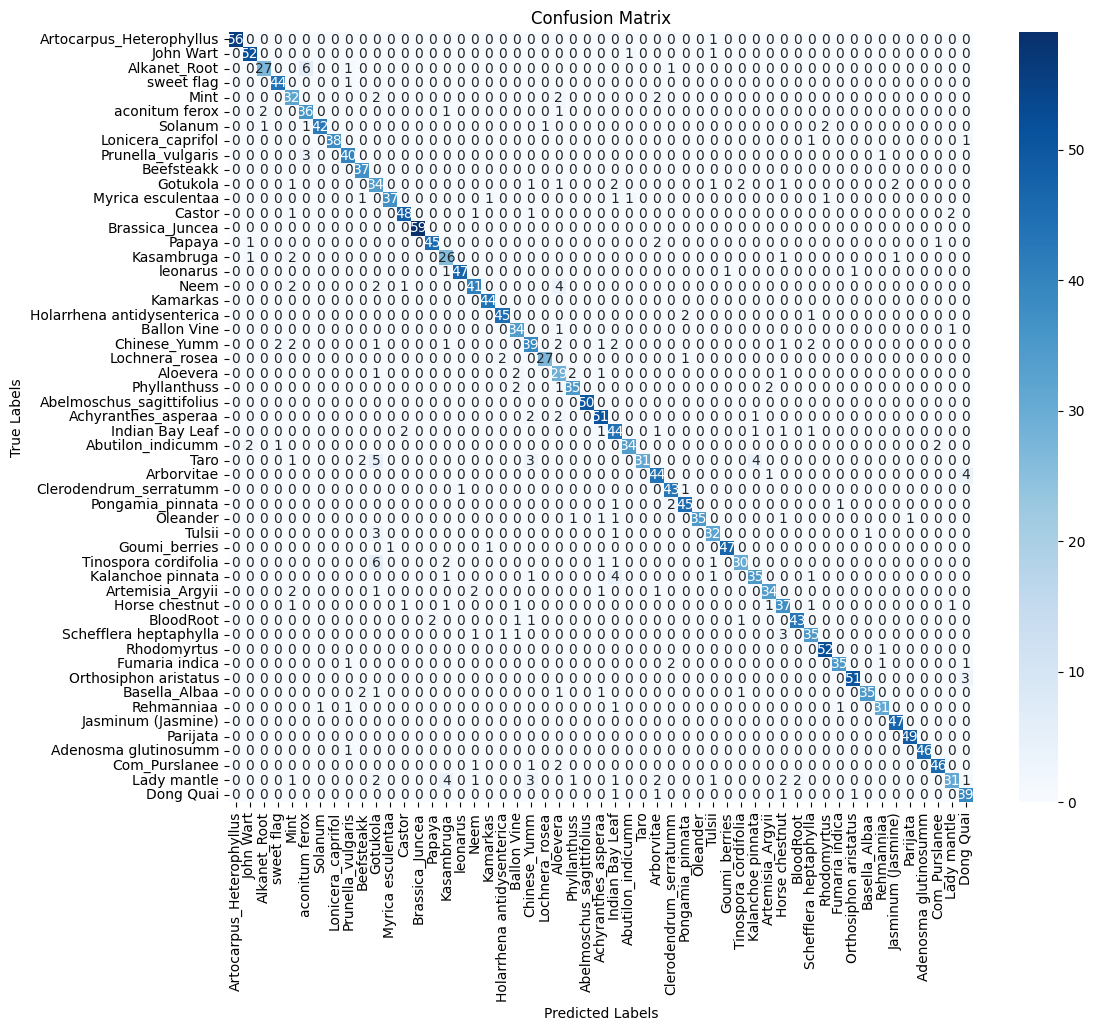

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


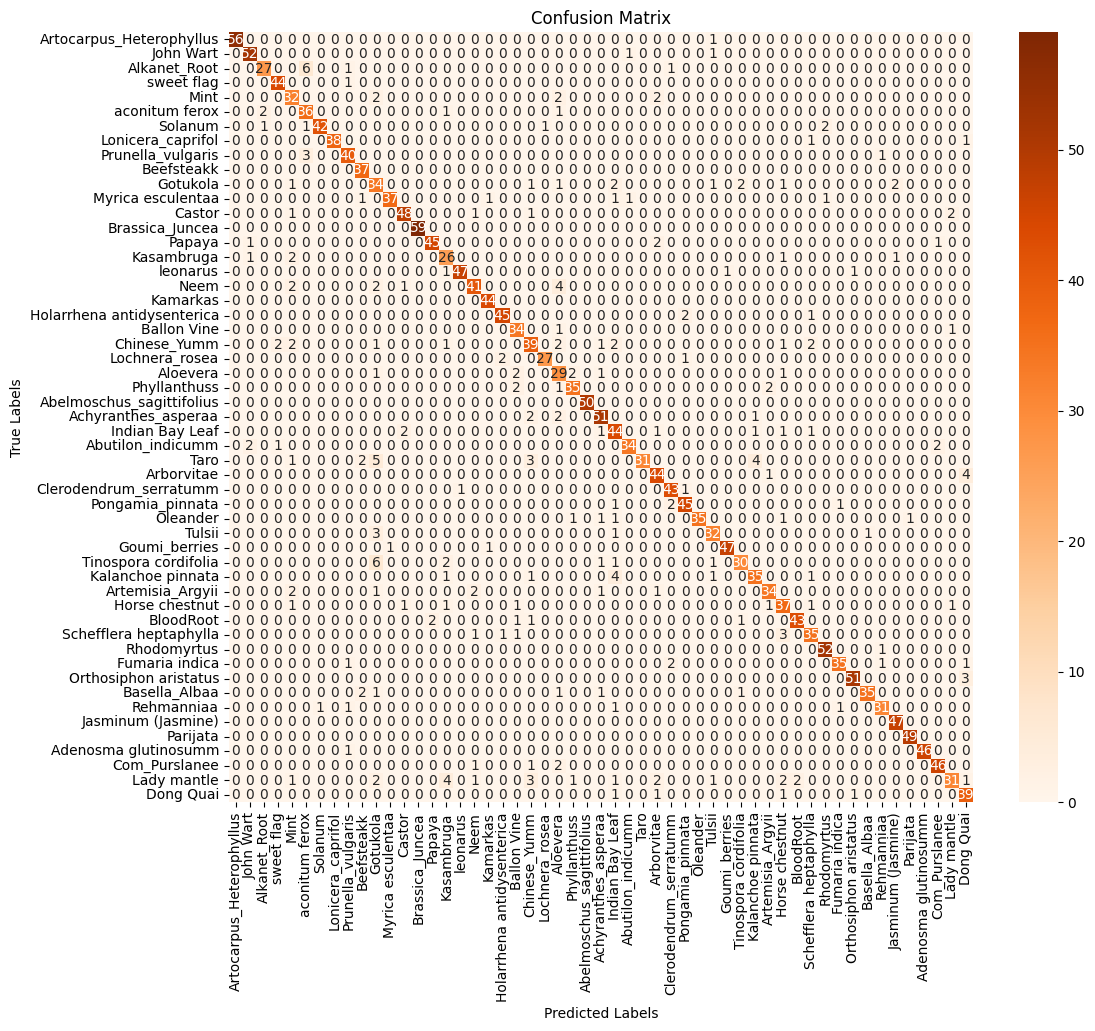

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]




# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.9999807

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.89661443

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.9980027

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.9951224



In [30]:
from sklearn.metrics import roc_auc_score

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val_one_hot, y_pred)

# Print the AUC-ROC score
print("Area Under the ROC Curve (AUC-ROC):", auc_roc)

Area Under the ROC Curve (AUC-ROC): 0.995557955629497


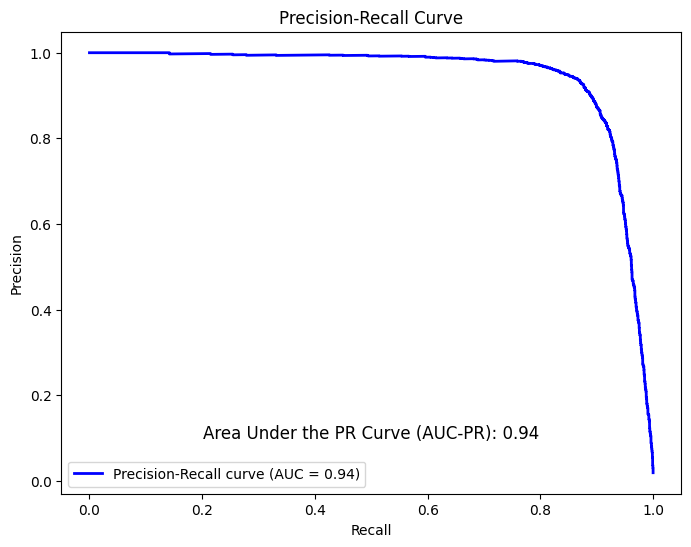

In [31]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_val_one_hot.ravel(), y_pred.ravel())

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Print AUC-PR score
plt.text(0.5, 0.1, "Area Under the PR Curve (AUC-PR): {:.2f}".format(auc_pr), fontsize=12, ha='center')
plt.show()

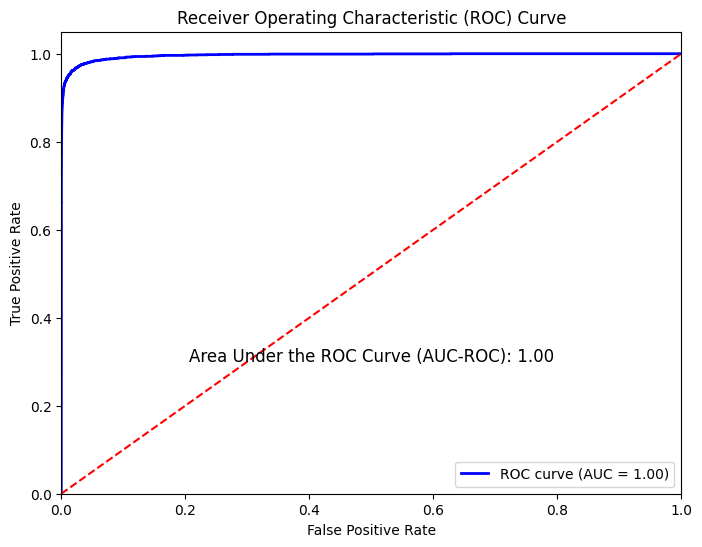

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val_one_hot, y_pred)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val_one_hot.ravel(), y_pred.ravel())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Print AUC-ROC score
plt.text(0.5, 0.3, "Area Under the ROC Curve (AUC-ROC): {:.2f}".format(auc_roc), fontsize=12, ha='center')
plt.show()

# MODEL 3

In [33]:
from tensorflow.keras import layers, models
img_shape = (180, 180, 3)
num_classes = 53

# Define the model
model = models.Sequential([
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(128, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    layers.Conv2D(256, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),

    # Additional Convolutional Layers
    layers.Conv2D(512, (7, 7), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
   

    # Flatten layer
    layers.Flatten(),

    # Additional Dense layers
    #layers.Dense(1024, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    #layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.0216 - auc: 0.5273 - categorical_accuracy: 0.0216 - loss: 4.8670 - precision: 0.0383 - recall: 0.0019
Epoch 1: val_accuracy improved from -inf to 0.03441, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 65s 407ms/step - accuracy: 0.0217 - auc: 0.5276 - categorical_accuracy: 0.0217 - loss: 4.8644 - precision: 0.0383 - recall: 0.0019 - val_accuracy: 0.0344 - val_auc: 0.5208 - val_categorical_accuracy: 0.0344 - val_loss: 4.0853 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0570 - auc: 0.6413 - categorical_accuracy: 0.0570 - loss: 4.1293 - precision: 0.0858 - recall: 0.0030
Epoch 2: val_accuracy improved from 0.03441 to 0.03609, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.0572 - auc: 0.6416 - categorical_accuracy: 0.0572 - loss: 4.1277 - precision: 0.0858 - recall: 0.0030 - val_accuracy: 0.0361 - v

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5135 - auc: 0.9630 - categorical_accuracy: 0.5135 - loss: 1.6298 - precision: 0.7651 - recall: 0.3294
Epoch 1: val_accuracy improved from -inf to 0.39866, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 58s 358ms/step - accuracy: 0.5134 - auc: 0.9630 - categorical_accuracy: 0.5134 - loss: 1.6299 - precision: 0.7651 - recall: 0.3294 - val_accuracy: 0.3987 - val_auc: 0.9052 - val_categorical_accuracy: 0.3987 - val_loss: 2.3455 - val_precision: 0.6472 - val_recall: 0.3072
Epoch 2/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5254 - auc: 0.9655 - categorical_accuracy: 0.5254 - loss: 1.5666 - precision: 0.7728 - recall: 0.3498
Epoch 2: val_accuracy did not improve from 0.39866
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.5253 - auc: 0.9655 - categorical_accuracy: 0.5253 - loss: 1.5669 - precision: 0.7727 - recall: 0.3497 - val_accuracy: 0.3546 - val_auc: 0.8956 - val_categorical_accuracy: 0.

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.7860 - auc: 0.9889 - categorical_accuracy: 0.7860 - loss: 0.7164 - precision: 0.8676 - recall: 0.7153
Epoch 1: val_accuracy improved from -inf to 0.63659, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 56s 356ms/step - accuracy: 0.7860 - auc: 0.9889 - categorical_accuracy: 0.7860 - loss: 0.7163 - precision: 0.8676 - recall: 0.7154 - val_accuracy: 0.6366 - val_auc: 0.9568 - val_categorical_accuracy: 0.6366 - val_loss: 1.4009 - val_precision: 0.7484 - val_recall: 0.6005
Epoch 2/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8019 - auc: 0.9881 - categorical_accuracy: 0.8019 - loss: 0.6874 - precision: 0.8831 - recall: 0.7330
Epoch 2: val_accuracy improved from 0.63659 to 0.66093, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.8018 - auc: 0.9881 - categorical_accuracy: 0.8018 - loss: 0.6875 - precision: 0.8830 - recall: 0.7330 - val_accuracy: 0.6609 - val_auc:

In [37]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8344 - auc: 0.9684 - categorical_accuracy: 0.8344 - loss: 0.7915 - precision: 0.8597 - recall: 0.8235
Test Loss: 0.755181610584259
Test Accuracy: 0.8364093899726868


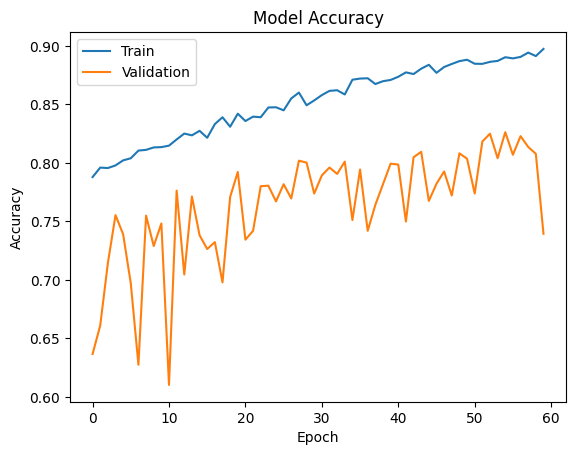

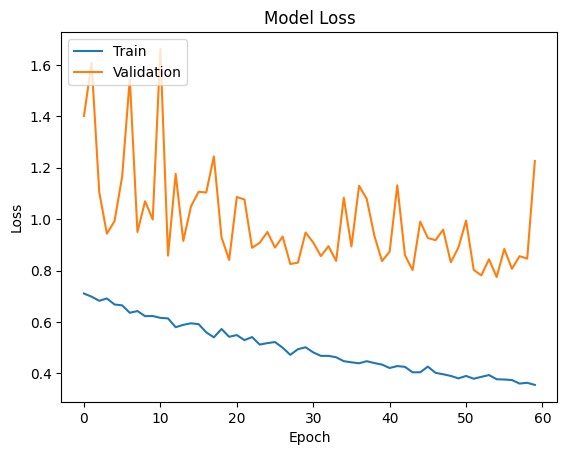

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step


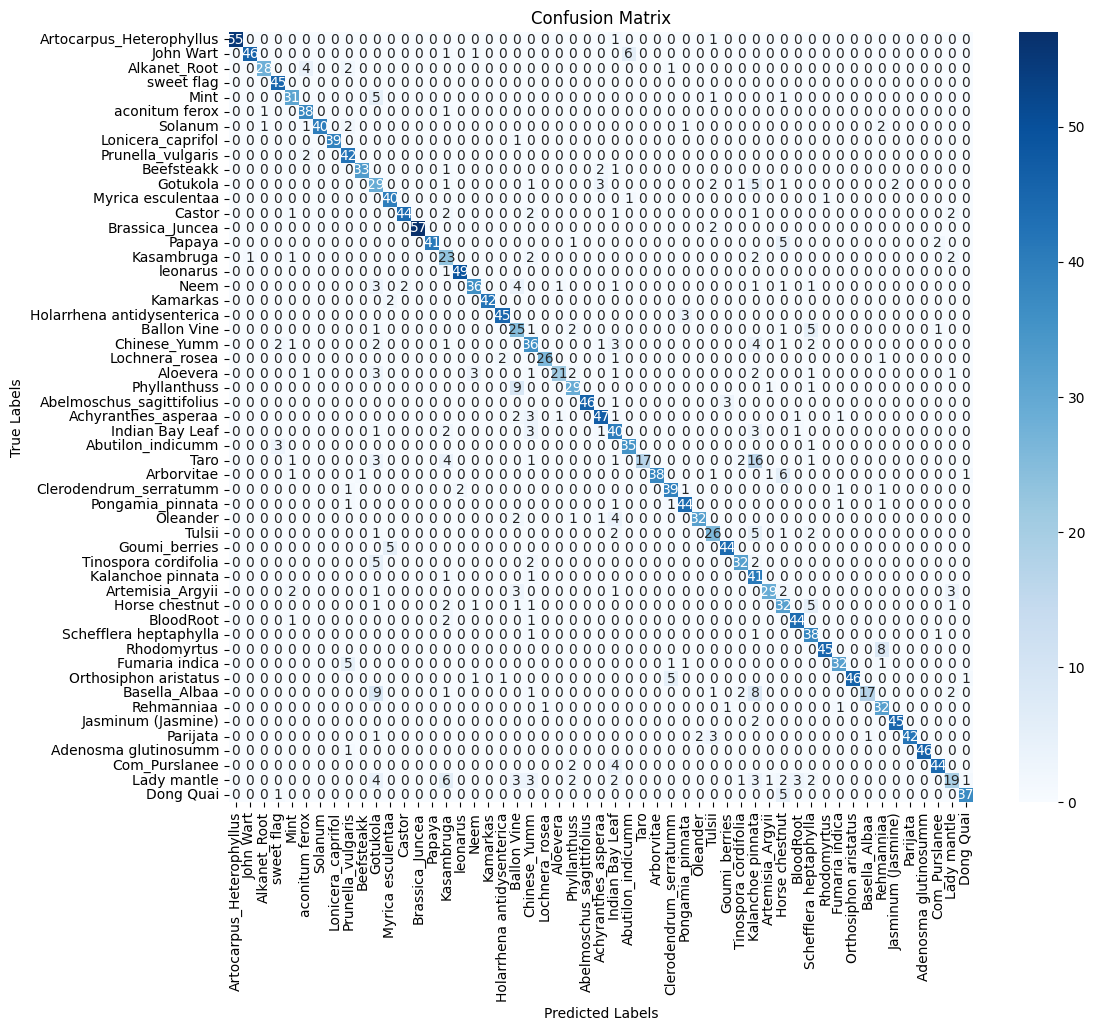

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]




# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.99998176

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.60523176

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.6555105

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.9866751



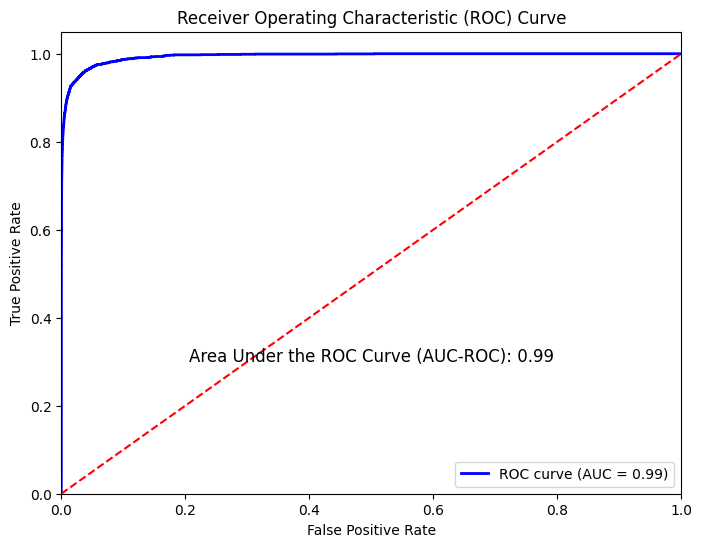

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val_one_hot, y_pred)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val_one_hot.ravel(), y_pred.ravel())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Print AUC-ROC score
plt.text(0.5, 0.3, "Area Under the ROC Curve (AUC-ROC): {:.2f}".format(auc_roc), fontsize=12, ha='center')
plt.show()

# MODEL -4

In [42]:
from tensorflow.keras import layers, models
img_shape = (180, 180, 3)
num_classes = 53

# Define the model
model = models.Sequential([
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (2, 2),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(128, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    layers.Conv2D(256, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),

    # Additional Convolutional Layers
    layers.Conv2D(512, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    #layers.Conv2D(512, (3, 3),padding='same', activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.5),

    # Flatten layer
    layers.Flatten(),

    # Additional Dense layers
    #layers.Dense(1024, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    #layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.0261 - auc: 0.5271 - categorical_accuracy: 0.0261 - loss: 4.8592 - precision: 0.0548 - recall: 0.0029
Epoch 1: val_accuracy improved from -inf to 0.01595, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 402ms/step - accuracy: 0.0262 - auc: 0.5274 - categorical_accuracy: 0.0262 - loss: 4.8557 - precision: 0.0555 - recall: 0.0029 - val_accuracy: 0.0159 - val_auc: 0.5019 - val_categorical_accuracy: 0.0159 - val_loss: 4.1110 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0669 - auc: 0.6739 - categorical_accuracy: 0.0669 - loss: 3.8889 - precision: 0.1972 - recall: 0.0106
Epoch 2: val_accuracy improved from 0.01595 to 0.02266, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.0670 - auc: 0.6742 - categorical_accuracy: 0.0670 - loss: 3.8879 - precision: 0.1974 - recall: 0.0106 - val_accuracy: 0.0227 - 

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.6013 - auc: 0.9737 - categorical_accuracy: 0.6013 - loss: 1.3250 - precision: 0.7972 - recall: 0.4586
Epoch 1: val_accuracy improved from -inf to 0.44859, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 59s 359ms/step - accuracy: 0.6012 - auc: 0.9737 - categorical_accuracy: 0.6012 - loss: 1.3253 - precision: 0.7972 - recall: 0.4586 - val_accuracy: 0.4486 - val_auc: 0.9280 - val_categorical_accuracy: 0.4486 - val_loss: 2.0402 - val_precision: 0.6499 - val_recall: 0.3584
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6076 - auc: 0.9735 - categorical_accuracy: 0.6076 - loss: 1.3116 - precision: 0.8057 - recall: 0.4645
Epoch 2: val_accuracy did not improve from 0.44859
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.6076 - auc: 0.9735 - categorical_accuracy: 0.6076 - loss: 1.3115 - precision: 0.8058 - recall: 0.4645 - val_accuracy: 0.3097 - val_auc: 0.8396 - val_categorical_accuracy: 0.

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.8138 - auc: 0.9909 - categorical_accuracy: 0.8138 - loss: 0.6182 - precision: 0.8832 - recall: 0.7607
Epoch 1: val_accuracy improved from -inf to 0.68401, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 58s 360ms/step - accuracy: 0.8138 - auc: 0.9909 - categorical_accuracy: 0.8138 - loss: 0.6184 - precision: 0.8831 - recall: 0.7606 - val_accuracy: 0.6840 - val_auc: 0.9580 - val_categorical_accuracy: 0.6840 - val_loss: 1.2873 - val_precision: 0.7448 - val_recall: 0.6441
Epoch 2/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8237 - auc: 0.9903 - categorical_accuracy: 0.8237 - loss: 0.6067 - precision: 0.8837 - recall: 0.7684
Epoch 2: val_accuracy did not improve from 0.68401
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.8237 - auc: 0.9903 - categorical_accuracy: 0.8237 - loss: 0.6067 - precision: 0.8838 - recall: 0.7685 - val_accuracy: 0.6815 - val_auc: 0.9514 - val_categorical_accuracy: 0.

In [46]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8604 - auc: 0.9795 - categorical_accuracy: 0.8604 - loss: 0.6257 - precision: 0.8882 - recall: 0.8478
Test Loss: 0.6282485127449036
Test Accuracy: 0.8515100479125977


In [47]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg",
               "/kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg",
               "/kaggle/input/newherb300/data300/Abutilon_indicumm/Abutilon_indicum (10).jpeg",
               "/kaggle/input/newherb300/data300/Achyranthes_asperaa/Achyranthes_asper (100).jpeg",
               "/kaggle/input/newherb300/data300/Adenosma glutinosumm/Adenosma glutinosumm (253).jpeg",
               "/kaggle/input/newherb300/data300/Alkanet_Root/Alkane root (100).jpeg",
               "/kaggle/input/newherb300/data300/Aloevera/Aloevera (10).jpeg",
               "/kaggle/input/newherb300/data300/Arborvitae/Arborvitae (100).jpeg",
               "/kaggle/input/newherb300/data300/Artemisia_Argyii/Artemisia argyii (109).png",
               "/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (100).jpg",
               "/kaggle/input/newherb300/data300/Ballon Vine/Ballon vine  (10).jpeg",
               "/kaggle/input/newherb300/data300/Basella_Albaa/Basella alba  (10).jpeg",
               "/kaggle/input/newherb300/data300/Beefsteakk/Beefsteakk (101).jpeg",
               "/kaggle/input/newherb300/data300/BloodRoot/BloodRoot (10).jpeg",
               "/kaggle/input/newherb300/data300/Brassica_Juncea/Brassica Juncea (100).jpg",
               "/kaggle/input/newherb300/data300/Castor/castor (10).jpeg",
               "/kaggle/input/newherb300/data300/Chinese_Yumm/Chinese Yumm (10).jpeg",
               "/kaggle/input/newherb300/data300/Clerodendrum_serratumm/Clerodendrum serratum (10).jpeg",
               "/kaggle/input/newherb300/data300/Com_Purslanee/Com purslanee (100).jpeg",
               "/kaggle/input/newherb300/data300/Dong Quai/Dong Quai  (10).jpeg",
               "/kaggle/input/newherb300/data300/Fumaria indica/Fumaria indica (101).jpeg",
               "/kaggle/input/newherb300/data300/Gotukola/Gotukola (10).jpeg",
               "/kaggle/input/newherb300/data300/Goumi_berries/Goumi berries (10).jpeg",
               "/kaggle/input/newherb300/data300/Holarrhena antidysenterica/Holarrhena antidysentericaa (10).jpeg",
               "/kaggle/input/newherb300/data300/Horse chestnut/Horse chestnut (10).jpeg",
               "/kaggle/input/newherb300/data300/Indian Bay Leaf/Indian bayleaf  (1).png",
               "/kaggle/input/newherb300/data300/Jasminum (Jasmine)/jasminum (103).jpg",
               "/kaggle/input/newherb300/data300/John Wart/John Wart (1).jpeg",
               "/kaggle/input/newherb300/data300/Kalanchoe pinnata/Kalanchoe pinnata  (1).png",
               "/kaggle/input/newherb300/data300/Kamarkas/kamarkas (10).jpeg",
               "/kaggle/input/newherb300/data300/Kasambruga/Kasambruga (1).png",
               "/kaggle/input/newherb300/data300/Lady mantle/Lady mantlee (10).jpeg",
               "/kaggle/input/newherb300/data300/Lochnera_rosea/Lochnera rosea (10).jpg","/kaggle/input/newherb300/data300/Lonicera_caprifol/Lonicera caprifoliumm (1).png",
               "/kaggle/input/newherb300/data300/Mint/Mint  (1).png","/kaggle/input/newherb300/data300/Myrica esculentaa/Myrica esculenta  (10).jpeg",
               "/kaggle/input/newherb300/data300/Neem/Neem (1).jpeg","/kaggle/input/newherb300/data300/Oleander/Oleander (10).jpeg",
               "/kaggle/input/newherb300/data300/Orthosiphon aristatus/Orthosiphon aristatus (1).png","/kaggle/input/newherb300/data300/Parijata/Parijata  (10).jpg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg","/kaggle/input/newherb300/data300/Pongamia_pinnata/Pongamia pinnata a (1).jpeg",
               "/kaggle/input/newherb300/data300/Prunella_vulgaris/Prunella vulgariss  (1).jpeg","/kaggle/input/newherb300/data300/Rehmanniaa/Rehmanniaa (1).png",
               "/kaggle/input/newherb300/data300/Rhodomyrtus/Rhodomyrtus tomentosaa  (1).jpeg","/kaggle/input/newherb300/data300/Schefflera heptaphylla/Schefflera heptaphylla (1).jpeg",
               "/kaggle/input/newherb300/data300/Solanum/Solanum (1).jpeg","/kaggle/input/newherb300/data300/Tinospora cordifolia/Tinospora cordifolia (1).png",
               "/kaggle/input/newherb300/data300/Tulsii/Tulsii (1).jpeg","/kaggle/input/newherb300/data300/aconitum ferox/aconitum ferox  (1).jpeg",
               "/kaggle/input/newherb300/data300/leonarus/Leonuruss (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.99997413

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.94556093

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.99791986

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.98780245

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: /kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.99967855

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/newherb300/data300/Abutilon_in

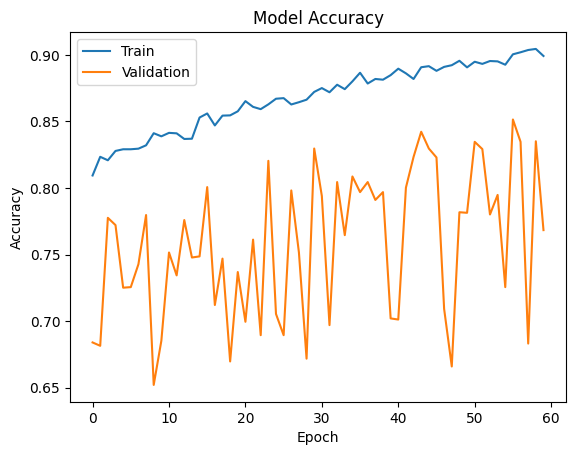

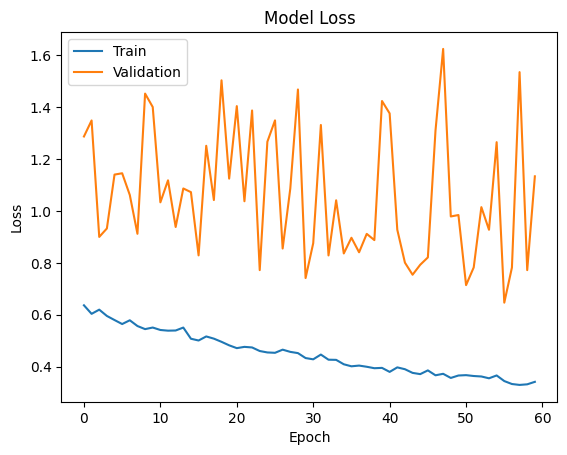

In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step


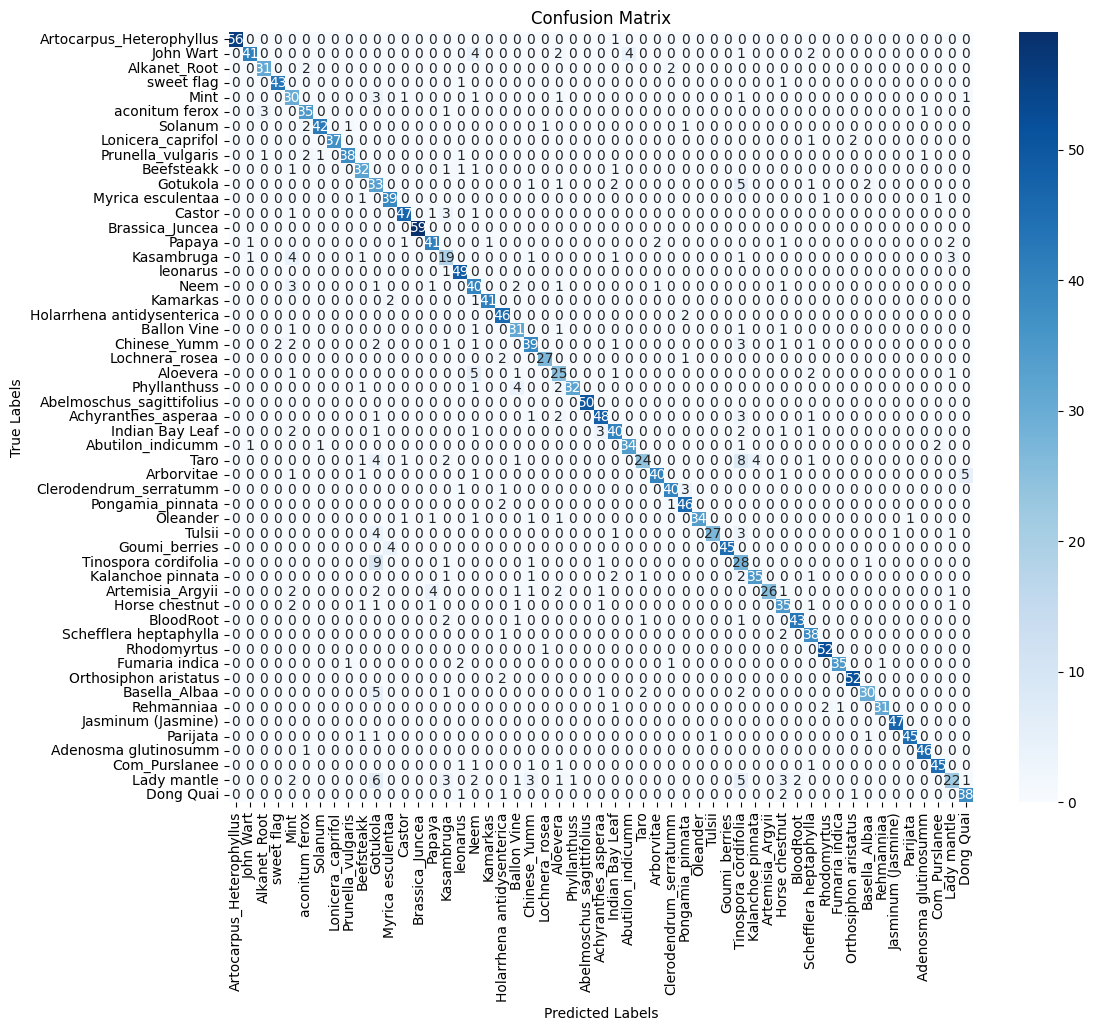

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]




# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: sweet flag
Predicted Probability: 0.99997413

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Taro
Predicted Probability: 0.94556093

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Papaya
Predicted Probability: 0.99791986

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Phyllanthuss
Predicted Probability: 0.98780245



# model 5

In [51]:
from tensorflow.keras import layers, models
img_shape = (180, 180, 3)
num_classes = 53

# Define the model
model = models.Sequential([
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    #layers.Conv2D(64, (2, 2),padding='same', activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.3),
    
    layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(128, (3, 3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    layers.Conv2D(256, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),

    # Additional Convolutional Layers
    layers.Conv2D(512, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    #layers.Conv2D(512, (3, 3),padding='same', activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.5),

    # Flatten layer
    layers.Flatten(),

    # Additional Dense layers
    #layers.Dense(1024, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    #layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.0277 - auc: 0.5426 - categorical_accuracy: 0.0277 - loss: 4.7912 - precision: 0.0658 - recall: 0.0037
Epoch 1: val_accuracy improved from -inf to 0.02350, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 419ms/step - accuracy: 0.0279 - auc: 0.5432 - categorical_accuracy: 0.0279 - loss: 4.7872 - precision: 0.0664 - recall: 0.0038 - val_accuracy: 0.0235 - val_auc: 0.5010 - val_categorical_accuracy: 0.0235 - val_loss: 7.0958 - val_precision: 0.0326 - val_recall: 0.0151
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.0886 - auc: 0.7225 - categorical_accuracy: 0.0886 - loss: 3.7220 - precision: 0.2707 - recall: 0.0166
Epoch 2: val_accuracy did not improve from 0.02350
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.0888 - auc: 0.7228 - categorical_accuracy: 0.0888 - loss: 3.7208 - precision: 0.2710 - recall: 0.0166 - val_accuracy: 0.0222 - val_auc: 0.5102 - val_categorical_accuracy: 0.

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.6786 - auc: 0.9798 - categorical_accuracy: 0.6786 - loss: 1.0733 - precision: 0.8344 - recall: 0.5613
Epoch 1: val_accuracy improved from -inf to 0.62149, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.6786 - auc: 0.9798 - categorical_accuracy: 0.6786 - loss: 1.0734 - precision: 0.8343 - recall: 0.5613 - val_accuracy: 0.6215 - val_auc: 0.9642 - val_categorical_accuracy: 0.6215 - val_loss: 1.3475 - val_precision: 0.7641 - val_recall: 0.5275
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6941 - auc: 0.9833 - categorical_accuracy: 0.6941 - loss: 1.0159 - precision: 0.8337 - recall: 0.5820
Epoch 2: val_accuracy did not improve from 0.62149
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6941 - auc: 0.9833 - categorical_accuracy: 0.6941 - loss: 1.0160 - precision: 0.8337 - recall: 0.5820 - val_accuracy: 0.5976 - val_auc: 0.9635 - val_categorical_accuracy: 0.5

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.8998 - auc: 0.9961 - categorical_accuracy: 0.8998 - loss: 0.3381 - precision: 0.9246 - recall: 0.8785
Epoch 1: val_accuracy improved from -inf to 0.83844, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 350ms/step - accuracy: 0.8998 - auc: 0.9961 - categorical_accuracy: 0.8998 - loss: 0.3381 - precision: 0.9247 - recall: 0.8785 - val_accuracy: 0.8384 - val_auc: 0.9771 - val_categorical_accuracy: 0.8384 - val_loss: 0.6950 - val_precision: 0.8645 - val_recall: 0.8221
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9063 - auc: 0.9965 - categorical_accuracy: 0.9063 - loss: 0.3090 - precision: 0.9330 - recall: 0.8867
Epoch 2: val_accuracy did not improve from 0.83844
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.9063 - auc: 0.9964 - categorical_accuracy: 0.9063 - loss: 0.3090 - precision: 0.9330 - recall: 0.8867 - val_accuracy: 0.8242 - val_auc: 0.9742 - val_categorical_accuracy: 0.

In [55]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.8759 - auc: 0.9754 - categorical_accuracy: 0.8759 - loss: 0.6116 - precision: 0.9027 - recall: 0.8582
Test Loss: 0.5831931829452515
Test Accuracy: 0.8796141147613525


W0000 00:00:1710156368.579803      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


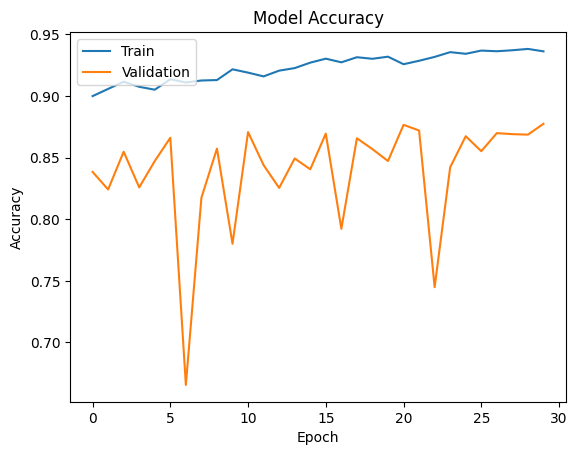

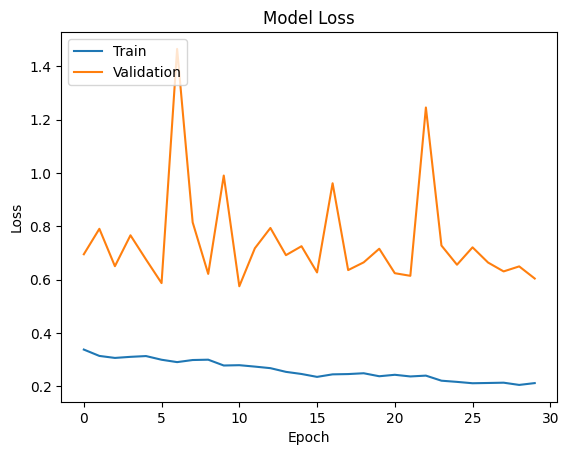

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


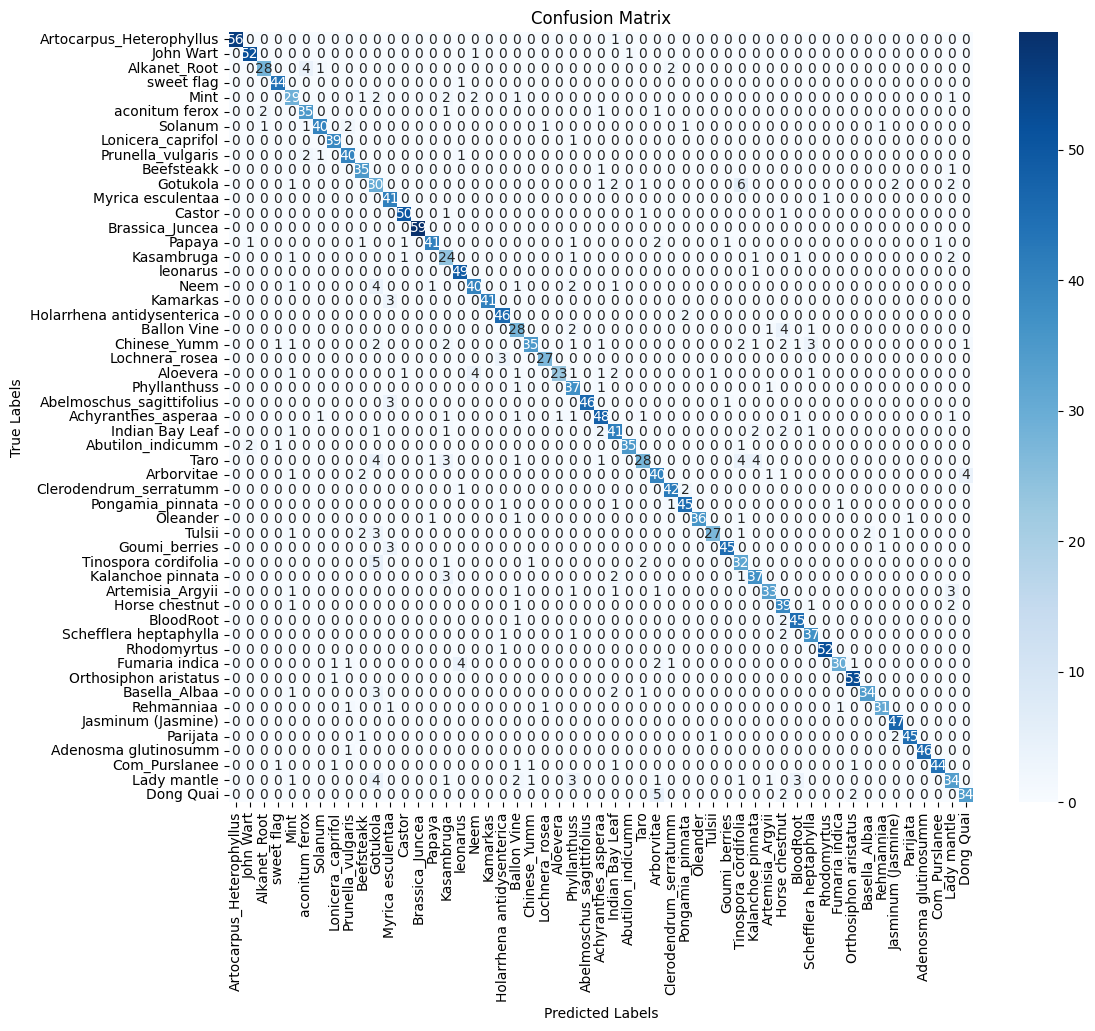

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg",
               "/kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg",
               "/kaggle/input/newherb300/data300/Abutilon_indicumm/Abutilon_indicum (10).jpeg",
               "/kaggle/input/newherb300/data300/Achyranthes_asperaa/Achyranthes_asper (100).jpeg",
               "/kaggle/input/newherb300/data300/Adenosma glutinosumm/Adenosma glutinosumm (253).jpeg",
               "/kaggle/input/newherb300/data300/Alkanet_Root/Alkane root (100).jpeg",
               "/kaggle/input/newherb300/data300/Aloevera/Aloevera (10).jpeg",
               "/kaggle/input/newherb300/data300/Arborvitae/Arborvitae (100).jpeg",
               "/kaggle/input/newherb300/data300/Artemisia_Argyii/Artemisia argyii (109).png",
               "/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (100).jpg",
               "/kaggle/input/newherb300/data300/Ballon Vine/Ballon vine  (10).jpeg",
               "/kaggle/input/newherb300/data300/Basella_Albaa/Basella alba  (10).jpeg",
               "/kaggle/input/newherb300/data300/Beefsteakk/Beefsteakk (101).jpeg",
               "/kaggle/input/newherb300/data300/BloodRoot/BloodRoot (10).jpeg",
               "/kaggle/input/newherb300/data300/Brassica_Juncea/Brassica Juncea (100).jpg",
               "/kaggle/input/newherb300/data300/Castor/castor (10).jpeg",
               "/kaggle/input/newherb300/data300/Chinese_Yumm/Chinese Yumm (10).jpeg",
               "/kaggle/input/newherb300/data300/Clerodendrum_serratumm/Clerodendrum serratum (10).jpeg",
               "/kaggle/input/newherb300/data300/Com_Purslanee/Com purslanee (100).jpeg",
               "/kaggle/input/newherb300/data300/Dong Quai/Dong Quai  (10).jpeg",
               "/kaggle/input/newherb300/data300/Fumaria indica/Fumaria indica (101).jpeg",
               "/kaggle/input/newherb300/data300/Gotukola/Gotukola (10).jpeg",
               "/kaggle/input/newherb300/data300/Goumi_berries/Goumi berries (10).jpeg",
               "/kaggle/input/newherb300/data300/Holarrhena antidysenterica/Holarrhena antidysentericaa (10).jpeg",
               "/kaggle/input/newherb300/data300/Horse chestnut/Horse chestnut (10).jpeg",
               "/kaggle/input/newherb300/data300/Indian Bay Leaf/Indian bayleaf  (1).png",
               "/kaggle/input/newherb300/data300/Jasminum (Jasmine)/jasminum (103).jpg",
               "/kaggle/input/newherb300/data300/John Wart/John Wart (1).jpeg",
               "/kaggle/input/newherb300/data300/Kalanchoe pinnata/Kalanchoe pinnata  (1).png",
               "/kaggle/input/newherb300/data300/Kamarkas/kamarkas (10).jpeg",
               "/kaggle/input/newherb300/data300/Kasambruga/Kasambruga (1).png",
               "/kaggle/input/newherb300/data300/Lady mantle/Lady mantlee (10).jpeg",
               "/kaggle/input/newherb300/data300/Lochnera_rosea/Lochnera rosea (10).jpg","/kaggle/input/newherb300/data300/Lonicera_caprifol/Lonicera caprifoliumm (1).png",
               "/kaggle/input/newherb300/data300/Mint/Mint  (1).png","/kaggle/input/newherb300/data300/Myrica esculentaa/Myrica esculenta  (10).jpeg",
               "/kaggle/input/newherb300/data300/Neem/Neem (1).jpeg","/kaggle/input/newherb300/data300/Oleander/Oleander (10).jpeg",
               "/kaggle/input/newherb300/data300/Orthosiphon aristatus/Orthosiphon aristatus (1).png","/kaggle/input/newherb300/data300/Parijata/Parijata  (10).jpg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg","/kaggle/input/newherb300/data300/Pongamia_pinnata/Pongamia pinnata a (1).jpeg",
               "/kaggle/input/newherb300/data300/Prunella_vulgaris/Prunella vulgariss  (1).jpeg","/kaggle/input/newherb300/data300/Rehmanniaa/Rehmanniaa (1).png",
               "/kaggle/input/newherb300/data300/Rhodomyrtus/Rhodomyrtus tomentosaa  (1).jpeg","/kaggle/input/newherb300/data300/Schefflera heptaphylla/Schefflera heptaphylla (1).jpeg",
               "/kaggle/input/newherb300/data300/Solanum/Solanum (1).jpeg","/kaggle/input/newherb300/data300/Tinospora cordifolia/Tinospora cordifolia (1).png",
               "/kaggle/input/newherb300/data300/Tulsii/Tulsii (1).jpeg","/kaggle/input/newherb300/data300/aconitum ferox/aconitum ferox  (1).jpeg",
               "/kaggle/input/newherb300/data300/leonarus/Leonuruss (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: Arborvitae
Predicted Probability: 0.61750585

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Basella_Albaa
Predicted Probability: 0.934672

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Aloevera
Predicted Probability: 0.521761

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Chinese_Yumm
Predicted Probability: 0.6612241

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: /kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg
Predicted Class Label: Parijata
Predicted Probability: 0.298219

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Abutilon_indicumm/Abutil

In [59]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: Arborvitae
Predicted Probability: 0.61750585

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Basella_Albaa
Predicted Probability: 0.934672

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Aloevera
Predicted Probability: 0.521761

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Chinese_Yumm
Predicted Probability: 0.6612241



# MODEL 6

In [60]:
from tensorflow.keras import layers, models
img_shape = (180, 180, 3)
num_classes = 53

# Define the model
model = models.Sequential([
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(128, (3, 3),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    layers.Conv2D(256, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),

    # Additional Convolutional Layers
    layers.Conv2D(512, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    
    #layers.Conv2D(512, (3, 3),padding='same', activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.5),

    # Flatten layer
    layers.Flatten(),

    # Additional Dense layers
    #layers.Dense(1024, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    #layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.0353 - auc: 0.5430 - categorical_accuracy: 0.0353 - loss: 4.8253 - precision: 0.0742 - recall: 0.0043
Epoch 1: val_accuracy improved from -inf to 0.02224, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 57s 357ms/step - accuracy: 0.0355 - auc: 0.5435 - categorical_accuracy: 0.0355 - loss: 4.8219 - precision: 0.0746 - recall: 0.0044 - val_accuracy: 0.0222 - val_auc: 0.5028 - val_categorical_accuracy: 0.0222 - val_loss: 7.8830 - val_precision: 0.0253 - val_recall: 0.0222
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.0917 - auc: 0.7032 - categorical_accuracy: 0.0917 - loss: 3.8136 - precision: 0.2783 - recall: 0.0174
Epoch 2: val_accuracy did not improve from 0.02224
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.0918 - auc: 0.7035 - categorical_accuracy: 0.0918 - loss: 3.8123 - precision: 0.2786 - recall: 0.0174 - val_accuracy: 0.0222 - val_auc: 0.5098 - val_categorical_accuracy: 0.0

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6754 - auc: 0.9793 - categorical_accuracy: 0.6754 - loss: 1.0952 - precision: 0.8223 - recall: 0.5604
Epoch 1: val_accuracy improved from -inf to 0.55141, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 56s 351ms/step - accuracy: 0.6754 - auc: 0.9793 - categorical_accuracy: 0.6754 - loss: 1.0954 - precision: 0.8223 - recall: 0.5603 - val_accuracy: 0.5514 - val_auc: 0.9470 - val_categorical_accuracy: 0.5514 - val_loss: 1.6297 - val_precision: 0.6932 - val_recall: 0.4817
Epoch 2/40
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7012 - auc: 0.9818 - categorical_accuracy: 0.7012 - loss: 1.0115 - precision: 0.8386 - recall: 0.5817
Epoch 2: val_accuracy improved from 0.55141 to 0.60008, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.7011 - auc: 0.9818 - categorical_accuracy: 0.7011 - loss: 1.0117 - precision: 0.8386 - recall: 0.5817 - val_accuracy: 0.6001 - val_auc: 

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy', 'precision', 'recall', metrics.AUC(name='auc')]
)

# Model Training
callbacks = [checkpoint, early_stopping]

history = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8670 - auc: 0.9943 - categorical_accuracy: 0.8670 - loss: 0.4358 - precision: 0.9071 - recall: 0.8337
Epoch 1: val_accuracy improved from -inf to 0.82081, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 55s 352ms/step - accuracy: 0.8670 - auc: 0.9943 - categorical_accuracy: 0.8670 - loss: 0.4357 - precision: 0.9071 - recall: 0.8337 - val_accuracy: 0.8208 - val_auc: 0.9770 - val_categorical_accuracy: 0.8208 - val_loss: 0.7229 - val_precision: 0.8586 - val_recall: 0.8053
Epoch 2/60
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8766 - auc: 0.9945 - categorical_accuracy: 0.8766 - loss: 0.4089 - precision: 0.9122 - recall: 0.8466
Epoch 2: val_accuracy did not improve from 0.82081
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.8765 - auc: 0.9945 - categorical_accuracy: 0.8765 - loss: 0.4090 - precision: 0.9122 - recall: 0.8466 - val_accuracy: 0.7747 - val_auc: 0.9675 - val_categorical_accuracy: 0.7

In [64]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8624 - auc: 0.9722 - categorical_accuracy: 0.8624 - loss: 0.7152 - precision: 0.8818 - recall: 0.8587
Test Loss: 0.6497483849525452
Test Accuracy: 0.8716443181037903


W0000 00:00:1710158117.376699      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


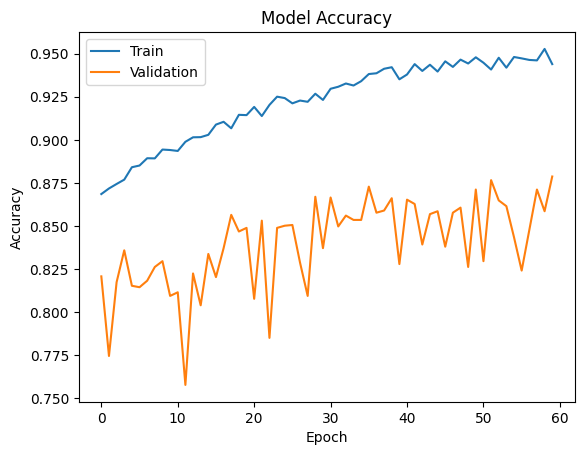

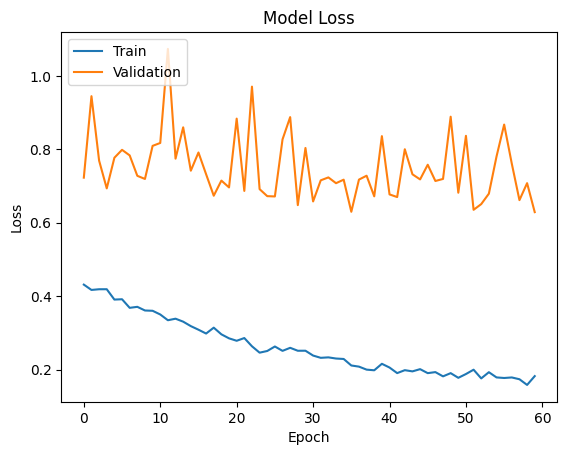

In [65]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step


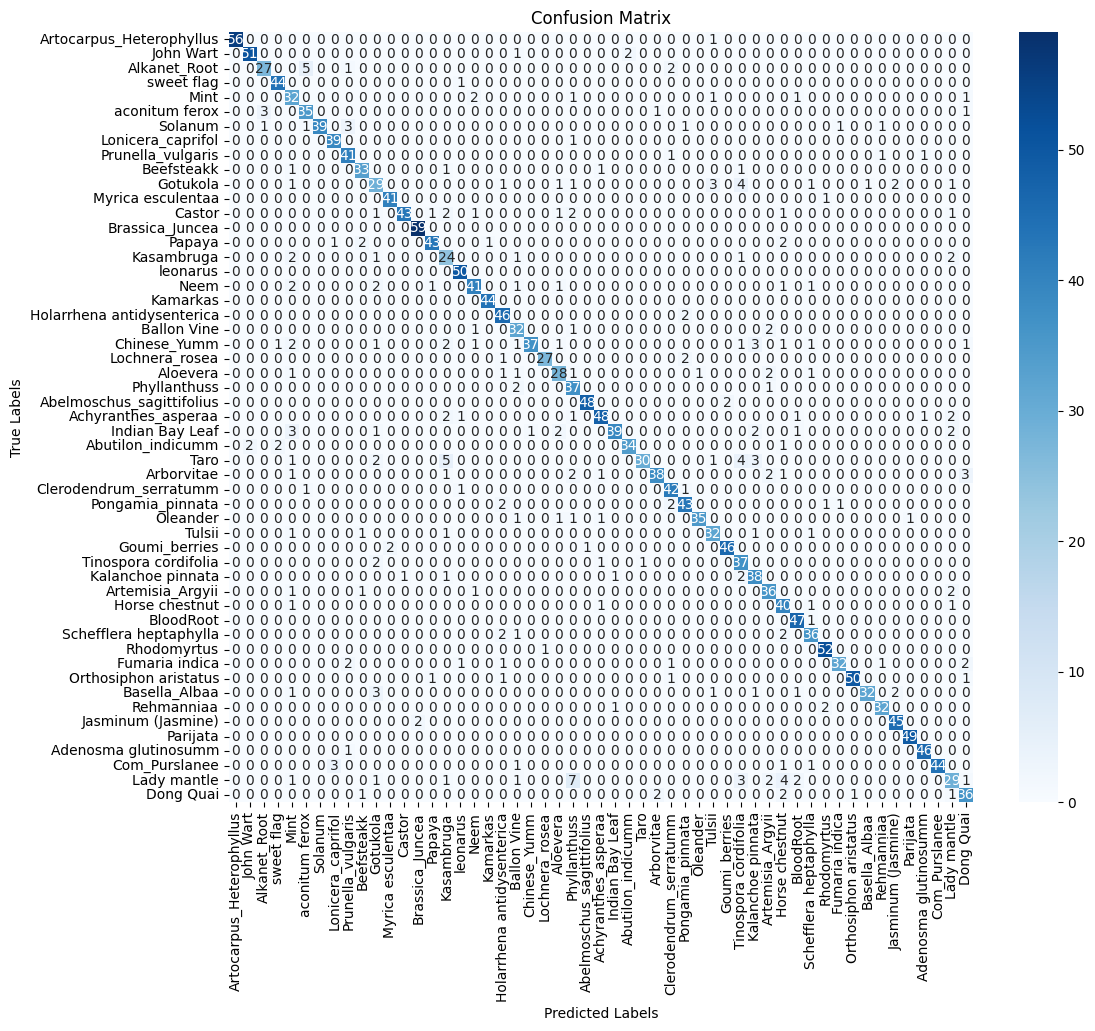

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


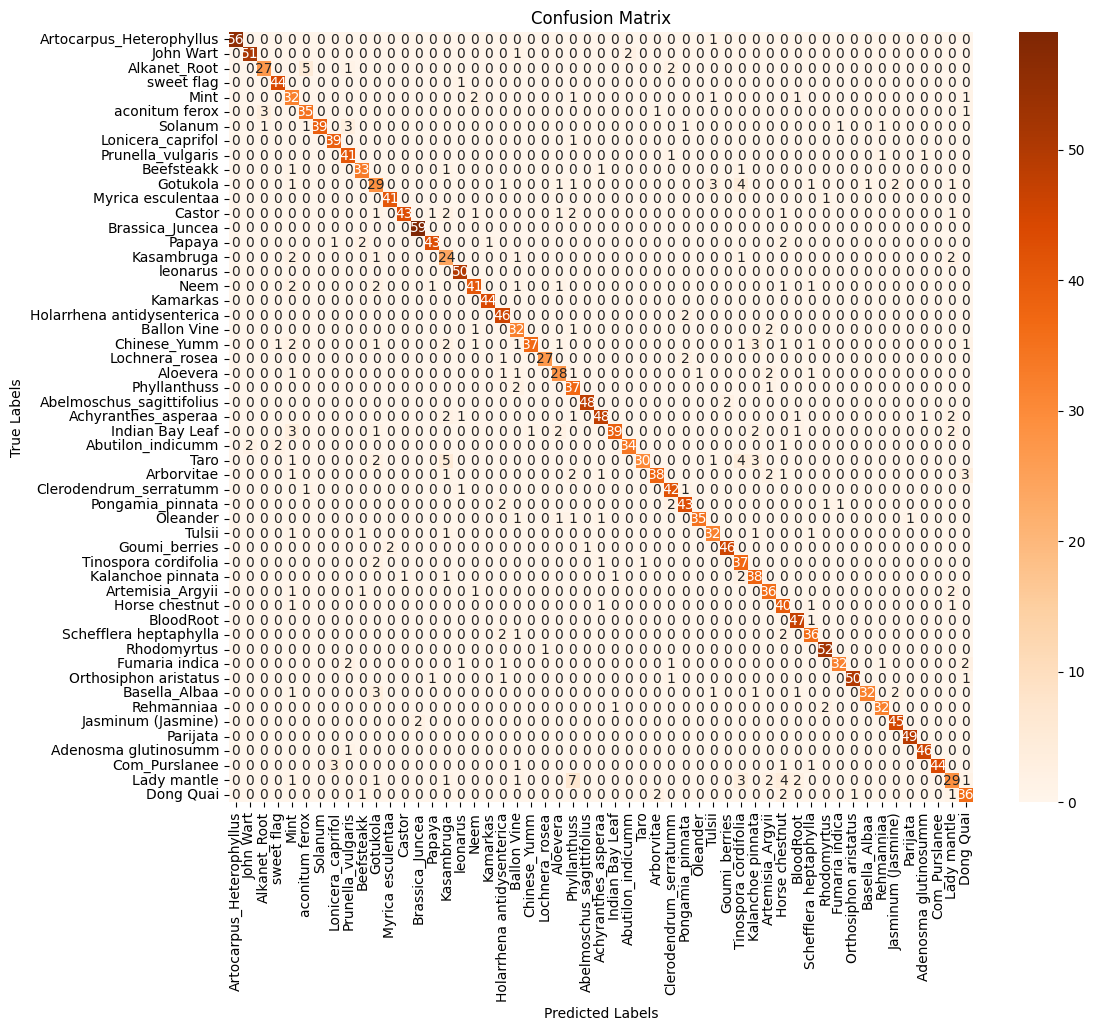

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_one_hot, axis=1)  # Assuming y_val_one_hot is your one-hot encoded validation labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Map class indices to class labels
class_index_to_label = {index: label for index, label in enumerate(class_labels)}

# Plot the confusion matrix with class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [68]:
from sklearn.metrics import roc_auc_score

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val_one_hot, y_pred)

# Print the AUC-ROC score
print("Area Under the ROC Curve (AUC-ROC):", auc_roc)


Area Under the ROC Curve (AUC-ROC): 0.996055752440052


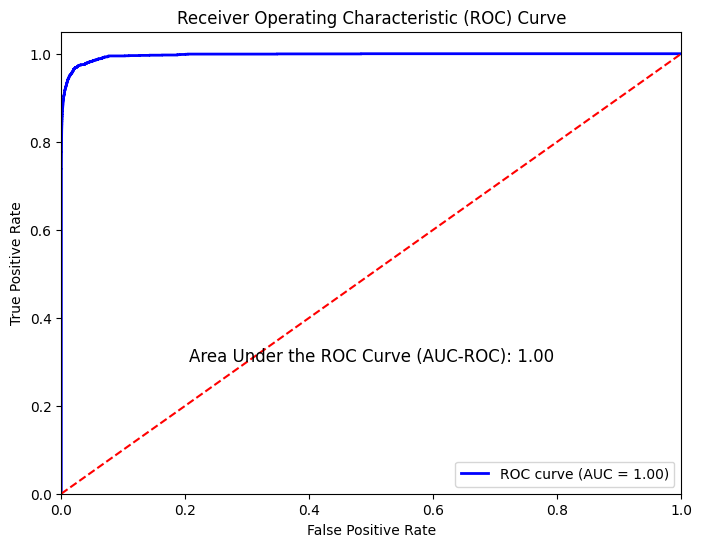

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val_one_hot, y_pred)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val_one_hot.ravel(), y_pred.ravel())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Print AUC-ROC score
plt.text(0.5, 0.3, "Area Under the ROC Curve (AUC-ROC): {:.2f}".format(auc_roc), fontsize=12, ha='center')
plt.show()


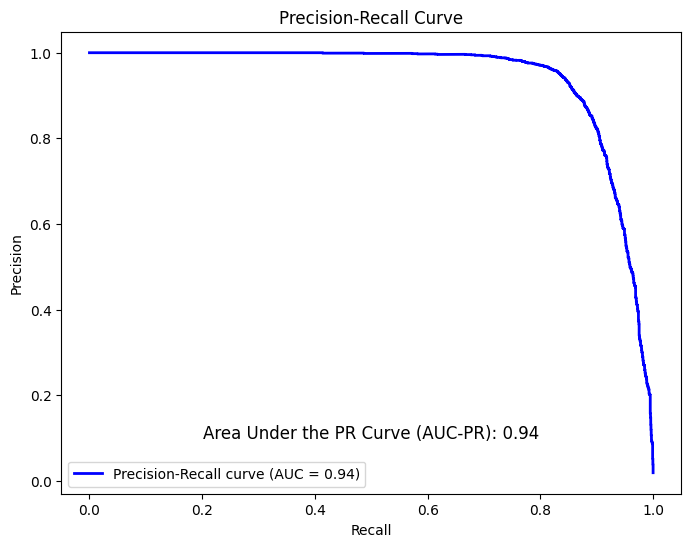

In [70]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_val_one_hot is your one-hot encoded validation labels
# and y_pred is your predicted probabilities for each class

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_val_one_hot.ravel(), y_pred.ravel())

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Print AUC-PR score
plt.text(0.5, 0.1, "Area Under the PR Curve (AUC-PR): {:.2f}".format(auc_pr), fontsize=12, ha='center')
plt.show()


In [71]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: Jasminum (Jasmine)
Predicted Probability: 0.68823045

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.7060836

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.89591855

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.6246464



In [72]:
import cv2
import numpy as np

# List of image paths
image_paths = ["/kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg",
               "/kaggle/input/newherb300/data300/Taro/Taro (1).jpeg",
               "/kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg",
               "/kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg",
               "/kaggle/input/newherb300/data300/Abutilon_indicumm/Abutilon_indicum (10).jpeg",
               "/kaggle/input/newherb300/data300/Achyranthes_asperaa/Achyranthes_asper (100).jpeg",
               "/kaggle/input/newherb300/data300/Adenosma glutinosumm/Adenosma glutinosumm (253).jpeg",
               "/kaggle/input/newherb300/data300/Alkanet_Root/Alkane root (100).jpeg",
               "/kaggle/input/newherb300/data300/Aloevera/Aloevera (10).jpeg",
               "/kaggle/input/newherb300/data300/Arborvitae/Arborvitae (100).jpeg",
               "/kaggle/input/newherb300/data300/Artemisia_Argyii/Artemisia argyii (109).png",
               "/kaggle/input/newherb300/data300/Artocarpus_Heterophyllus/Artocarpus (100).jpg",
               "/kaggle/input/newherb300/data300/Ballon Vine/Ballon vine  (10).jpeg",
               "/kaggle/input/newherb300/data300/Basella_Albaa/Basella alba  (10).jpeg",
               "/kaggle/input/newherb300/data300/Beefsteakk/Beefsteakk (101).jpeg",
               "/kaggle/input/newherb300/data300/BloodRoot/BloodRoot (10).jpeg",
               "/kaggle/input/newherb300/data300/Brassica_Juncea/Brassica Juncea (100).jpg",
               "/kaggle/input/newherb300/data300/Castor/castor (10).jpeg",
               "/kaggle/input/newherb300/data300/Chinese_Yumm/Chinese Yumm (10).jpeg",
               "/kaggle/input/newherb300/data300/Clerodendrum_serratumm/Clerodendrum serratum (10).jpeg",
               "/kaggle/input/newherb300/data300/Com_Purslanee/Com purslanee (100).jpeg",
               "/kaggle/input/newherb300/data300/Dong Quai/Dong Quai  (10).jpeg",
               "/kaggle/input/newherb300/data300/Fumaria indica/Fumaria indica (101).jpeg",
               "/kaggle/input/newherb300/data300/Gotukola/Gotukola (10).jpeg",
               "/kaggle/input/newherb300/data300/Goumi_berries/Goumi berries (10).jpeg",
               "/kaggle/input/newherb300/data300/Holarrhena antidysenterica/Holarrhena antidysentericaa (10).jpeg",
               "/kaggle/input/newherb300/data300/Horse chestnut/Horse chestnut (10).jpeg",
               "/kaggle/input/newherb300/data300/Indian Bay Leaf/Indian bayleaf  (1).png",
               "/kaggle/input/newherb300/data300/Jasminum (Jasmine)/jasminum (103).jpg",
               "/kaggle/input/newherb300/data300/John Wart/John Wart (1).jpeg",
               "/kaggle/input/newherb300/data300/Kalanchoe pinnata/Kalanchoe pinnata  (1).png",
               "/kaggle/input/newherb300/data300/Kamarkas/kamarkas (10).jpeg",
               "/kaggle/input/newherb300/data300/Kasambruga/Kasambruga (1).png",
               "/kaggle/input/newherb300/data300/Lady mantle/Lady mantlee (10).jpeg",
               "/kaggle/input/newherb300/data300/Lochnera_rosea/Lochnera rosea (10).jpg","/kaggle/input/newherb300/data300/Lonicera_caprifol/Lonicera caprifoliumm (1).png",
               "/kaggle/input/newherb300/data300/Mint/Mint  (1).png","/kaggle/input/newherb300/data300/Myrica esculentaa/Myrica esculenta  (10).jpeg",
               "/kaggle/input/newherb300/data300/Neem/Neem (1).jpeg","/kaggle/input/newherb300/data300/Oleander/Oleander (10).jpeg",
               "/kaggle/input/newherb300/data300/Orthosiphon aristatus/Orthosiphon aristatus (1).png","/kaggle/input/newherb300/data300/Parijata/Parijata  (10).jpg",
               "/kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg","/kaggle/input/newherb300/data300/Pongamia_pinnata/Pongamia pinnata a (1).jpeg",
               "/kaggle/input/newherb300/data300/Prunella_vulgaris/Prunella vulgariss  (1).jpeg","/kaggle/input/newherb300/data300/Rehmanniaa/Rehmanniaa (1).png",
               "/kaggle/input/newherb300/data300/Rhodomyrtus/Rhodomyrtus tomentosaa  (1).jpeg","/kaggle/input/newherb300/data300/Schefflera heptaphylla/Schefflera heptaphylla (1).jpeg",
               "/kaggle/input/newherb300/data300/Solanum/Solanum (1).jpeg","/kaggle/input/newherb300/data300/Tinospora cordifolia/Tinospora cordifolia (1).png",
               "/kaggle/input/newherb300/data300/Tulsii/Tulsii (1).jpeg","/kaggle/input/newherb300/data300/aconitum ferox/aconitum ferox  (1).jpeg",
               "/kaggle/input/newherb300/data300/leonarus/Leonuruss (1).jpeg"
   
    # Add more image paths as needed
]

# Define the list of class labels
# Define the list of class labels
class_labels = [
    "Artocarpus_Heterophyllus", "John Wart", "Alkanet_Root", "sweet flag", "Mint", 
    "aconitum ferox", "Solanum", "Lonicera_caprifol", "Prunella_vulgaris", "Beefsteakk", 
    "Gotukola", "Myrica esculentaa", "Castor", "Brassica_Juncea", "Papaya", "Kasambruga", 
    "leonarus", "Neem", "Kamarkas", "Holarrhena antidysenterica", "Ballon Vine", 
    "Chinese_Yumm", "Lochnera_rosea", "Aloevera", "Phyllanthuss", "Abelmoschus_sagittifolius", 
    "Achyranthes_asperaa", "Indian Bay Leaf", "Abutilon_indicumm", "Taro", 
    "Arborvitae", "Clerodendrum_serratumm", "Pongamia_pinnata", "Oleander", "Tulsii", 
    "Goumi_berries", "Tinospora cordifolia", "Kalanchoe pinnata", "Artemisia_Argyii", 
    "Horse chestnut", "BloodRoot", "Schefflera heptaphylla", "Rhodomyrtus", "Fumaria indica", 
    "Orthosiphon aristatus", "Basella_Albaa", "Rehmanniaa", "Jasminum (Jasmine)", "Parijata", 
    "Adenosma glutinosumm", "Com_Purslanee", "Lady mantle", "Dong Quai"
]
# Preprocess each image and make predictions
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))  # Resize the image to match the input size of your model

    # Preprocess the image
    img = img.astype('float32') / 255  # Normalize the pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Get the probability value for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    # Print the predicted class label and probability
    print("Image:", image_path)
    print("Predicted Class Label:", predicted_class_label)
    print("Predicted Probability:", predicted_probability)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/sweet flag/Sweet flag (100).jpeg
Predicted Class Label: Jasminum (Jasmine)
Predicted Probability: 0.68823045

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/Taro/Taro (1).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.7060836

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: /kaggle/input/newherb300/data300/Papaya/Papaya (1).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.89591855

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/Phyllanthuss/Phyllanthus (1).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.6246464

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: /kaggle/input/newherb300/data300/Abelmoschus_sagittifolius/Abelmoschus_sagittifolius (10).jpeg
Predicted Class Label: Abelmoschus_sagittifolius
Predicted Probability: 0.88571346

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 